<a href="https://colab.research.google.com/github/SURE6361/Mitigating-crime-analysis/blob/main/Mitigating_Crime_Updated1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
df=pd.read_csv("/content/Crime_dataset_2014-2019 mitigating crime.csv")
df['Total'] = 1
df.head()

X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.405228  43.656982    7801  GO-20152165447  2015-12-18T03:58:00.000Z   
1 -79.307907  43.778732    7802  GO-20151417245  2015-08-15T21:45:00.000Z   
2 -79.225029  43.765942    7803  GO-20151421107  2015-08-16T16:00:00.000Z   
3 -79.140823  43.778648    7804  GO-20152167714  2015-11-26T13:00:00.000Z   
4 -79.288361  43.691235    7805  GO-20152169954  2015-12-18T19:50:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  offence  ...  \
0  2015-12-18T03:59:00.000Z  Commercial      1430      100  Assault  ...   
1  2015-08-17T22:11:00.000Z  Commercial      1430      100  Assault  ...   
2  2015-08-18T14:40:00.000Z   Apartment      2120      200      B&E  ...   
3  2015-12-18T13:38:00.000Z       Other      2120      200      B&E  ...   
4  2015-12-18T19:55:00.000Z  Commercial      1430      100  Assault  ...   

   occurrencedayofweek occurrencehour              MCI  Division Hood_ID  \
0           Friday                  3          Assault       D14      79   
1           Saturday               21          Assault       D42     118   
2           Sunday                 16  Break and Enter       D43     137   
3           Thursday               13  Break and Enter       D43     133   
4           Friday                 19          Assault       D55      61   

                  Neighbourhood       Long        Lat  ObjectId  Total  
0               University (79) -79.405228  43.656982      7001      1  
1  Tam O'Shanter-Sullivan (118) -79.307907  43.778732      7002      1  
2                  Woburn (137) -79.225029  43.765942      7003      1  
3  Centennial Scarborough (133) -79.140823  43.778648      7004      1  
4            Taylor-Massey (61) -79.288361  43.691235      7005      1  

[5 rows x 30 columns]

In [ ]:
df.dtypes
df.dropna()

X          Y  Index_ event_unique_id  \
0      -79.405228  43.656982    7801  GO-20152165447   
1      -79.307907  43.778732    7802  GO-20151417245   
2      -79.225029  43.765942    7803  GO-20151421107   
3      -79.140823  43.778648    7804  GO-20152167714   
4      -79.288361  43.691235    7805  GO-20152169954   
...           ...        ...     ...             ...   
206430 -79.563538  43.682293  205896   GO-2019336030   
206431 -79.348709  43.656227  205897   GO-2019336549   
206432 -79.598869  43.743992  205898   GO-2019187512   
206433 -79.348709  43.656227  205899   GO-2019336549   
206434 -79.217125  43.814865  205900   GO-2019327189   

                  occurrencedate              reporteddate premisetype  \
0       2015-12-18T03:58:00.000Z  2015-12-18T03:59:00.000Z  Commercial   
1       2015-08-15T21:45:00.000Z  2015-08-17T22:11:00.000Z  Commercial   
2       2015-08-16T16:00:00.000Z  2015-08-18T14:40:00.000Z   Apartment   
3       2015-11-26T13:00:00.000Z  2015-12-18T13:38:00.000Z       Other   
4       2015-12-18T19:50:00.000Z  2015-12-18T19:55:00.000Z  Commercial   
...                          ...                       ...         ...   
206430  2019-02-21T23:00:00.000Z  2019-02-22T13:27:00.000Z     Outside   
206431  2019-02-21T00:01:00.000Z  2019-02-22T14:45:00.000Z  Commercial   
206432  2019-01-30T12:30:00.000Z  2019-01-30T12:47:00.000Z       House   
206433  2019-02-21T00:01:00.000Z  2019-02-22T14:45:00.000Z  Commercial   
206434  2019-02-21T08:00:00.000Z  2019-02-21T08:09:00.000Z       House   

        ucr_code  ucr_ext                 offence  ...  occurrencedayofweek  \
0           1430      100                 Assault  ...           Friday       
1           1430      100                 Assault  ...           Saturday     
2           2120      200                     B&E  ...           Sunday       
3           2120      200                     B&E  ...           Thursday     
4           1430      100                 Assault  ...           Friday       
...          ...      ...                     ...  ...                  ...   
206430      2135      210  Theft Of Motor Vehicle  ...           Thursday     
206431      2135      210  Theft Of Motor Vehicle  ...           Thursday     
206432      2135      210  Theft Of Motor Vehicle  ...           Wednesday    
206433      2135      210  Theft Of Motor Vehicle  ...           Thursday     
206434      2135      210  Theft Of Motor Vehicle  ...           Thursday     

       occurrencehour              MCI  Division Hood_ID  \
0                   3          Assault       D14      79   
1                  21          Assault       D42     118   
2                  16  Break and Enter       D43     137   
3                  13  Break and Enter       D43     133   
4                  19          Assault       D55      61   
...               ...              ...       ...     ...   
206430             23       Auto Theft       D23       7   
206431              0       Auto Theft       D55      70   
206432             12       Auto Theft       D23       1   
206433              0       Auto Theft       D55      70   
206434              8       Auto Theft       D42     132   

                               Neighbourhood       Long        Lat  ObjectId  \
0                            University (79) -79.405228  43.656982      7001   
1               Tam O'Shanter-Sullivan (118) -79.307907  43.778732      7002   
2                               Woburn (137) -79.225029  43.765942      7003   
3               Centennial Scarborough (133) -79.140823  43.778648      7004   
4                         Taylor-Massey (61) -79.288361  43.691235      7005   
...                                      ...        ...        ...       ...   
206430  Willowridge-Martingrove-Richview (7) -79.563538  43.682293    205996   
206431                  South Riverdale (70) -79.348709  43.656227    205997   
206432            West Humber-Clairville (1) -79.598869  43.7439

In [ ]:
print('Original Data Size after dropping Duplicates')
df = df.drop_duplicates(subset='event_unique_id',keep='first')
df.shape

Original Data Size after dropping Duplicates


(179813, 30)

In [ ]:
drop_colmns = ['X', 'Y', 'Index_', 'reporteddate', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
               'reporteddayofweek', 'reportedhour', 'Hood_ID', 'ucr_code', 'ucr_ext', 'Division', 'occurrencedayofyear']
df_dropped = df.drop(columns=drop_colmns)

In [ ]:
df_dropped.dtypes

event_unique_id         object
occurrencedate          object
premisetype             object
offence                 object
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofweek     object
occurrencehour           int64
MCI                     object
Neighbourhood           object
Long                   float64
Lat                    float64
ObjectId                 int64
Total                    int64
dtype: object

                           offence   size
0      Administering Noxious Thing    204
1    Aggravated Aslt Peace Officer      8
2               Aggravated Assault   1342
3   Aggravated Assault Avails Pros     10
4   Air Gun Or Pistol: Bodily Harm     13
5                          Assault  66173
6      Assault - Force/Thrt/Impede    159
7   Assault - Resist/ Prevent Seiz   1925
8              Assault Bodily Harm   4052
9            Assault Peace Officer   2475
10   Assault Peace Officer Wpn/Cbh    144
11             Assault With Weapon  13625
12     Crim Negligence Bodily Harm     66
13  Disarming Peace/Public Officer     48
14  Discharge Firearm - Recklessly    787
15   Discharge Firearm With Intent    995
16              Pointing A Firearm    515
17  Traps Likely Cause Bodily Harm      1
18  Unlawfully Causing Bodily Harm     13
19  Use Firearm / Immit Commit Off     52


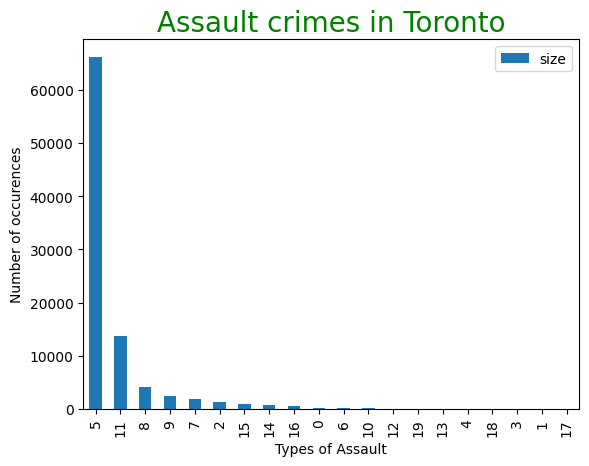

In [ ]:
assault = df[df['MCI'] == 'Assault']
assault_types = assault.groupby('offence',as_index=False).size()
print(assault_types)
ct = assault_types.sort_values(by='size', ascending = False) # Added by='size' to specify the column to sort by
ax = ct.plot.bar()
ax.set_xlabel('Types of Assault')
ax.set_ylabel('Number of occurences')
ax.set_title('Assault crimes in Toronto',color = 'green',fontsize=20)
plt.show()

In [ ]:
df_grouped = df_dropped.groupby(df_dropped['occurrenceyear'])

Analysis by year

In [ ]:
df_2015 = df_grouped.get_group(2015)
df_2016 = df_grouped.get_group(2016)
df_2017 = df_grouped.get_group(2017)

In [ ]:
df_2015_grouped = df_2015.groupby(df_2015['MCI']).count()
df_2016_grouped = df_2016.groupby(df_2016['MCI']).count()
df_2017_grouped = df_2017.groupby(df_2017['MCI']).count()

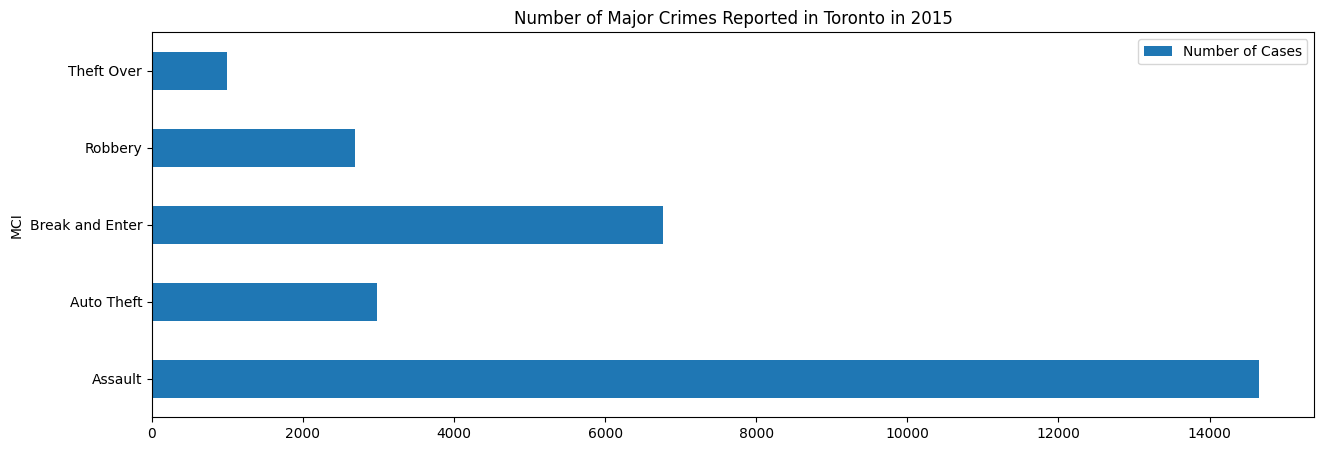

In [ ]:
plot = df_2015_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Cases']
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Major Crimes Reported in Toronto in 2015')

In [ ]:
df.head()

X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.405228  43.656982    7801  GO-20152165447  2015-12-18T03:58:00.000Z   
1 -79.307907  43.778732    7802  GO-20151417245  2015-08-15T21:45:00.000Z   
2 -79.225029  43.765942    7803  GO-20151421107  2015-08-16T16:00:00.000Z   
3 -79.140823  43.778648    7804  GO-20152167714  2015-11-26T13:00:00.000Z   
4 -79.288361  43.691235    7805  GO-20152169954  2015-12-18T19:50:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  offence  ...  \
0  2015-12-18T03:59:00.000Z  Commercial      1430      100  Assault  ...   
1  2015-08-17T22:11:00.000Z  Commercial      1430      100  Assault  ...   
2  2015-08-18T14:40:00.000Z   Apartment      2120      200      B&E  ...   
3  2015-12-18T13:38:00.000Z       Other      2120      200      B&E  ...   
4  2015-12-18T19:55:00.000Z  Commercial      1430      100  Assault  ...   

   occurrencedayofweek occurrencehour              MCI  Division Hood_ID  \
0           Friday                  3          Assault       D14      79   
1           Saturday               21          Assault       D42     118   
2           Sunday                 16  Break and Enter       D43     137   
3           Thursday               13  Break and Enter       D43     133   
4           Friday                 19          Assault       D55      61   

                  Neighbourhood       Long        Lat  ObjectId  Total  
0               University (79) -79.405228  43.656982      7001      1  
1  Tam O'Shanter-Sullivan (118) -79.307907  43.778732      7002      1  
2                  Woburn (137) -79.225029  43.765942      7003      1  
3  Centennial Scarborough (133) -79.140823  43.778648      7004      1  
4            Taylor-Massey (61) -79.288361  43.691235      7005      1  

[5 rows x 30 columns]

In [ ]:
col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']


df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1]

#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1]

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1]

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1]

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1]

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1]

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1]

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1]

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

In [ ]:
df2.head()

occurrenceyear  occurrencemonth  occurrenceday  occurrencedayofyear  \
0               0                0           18.0                    0   
1               0                1           15.0                    1   
2               0                1           16.0                    2   
3               0                2           26.0                    3   
4               0                0           18.0                    0   

   occurrencedayofweek  occurrencehour  MCI  Division  Hood_ID  premisetype  \
0                    0               0    0         0        0            0   
1                    1               1    0         1        1            0   
2                    2               2    1         2        2            1   
3                    3               3    1         2        3            2   
4                    0               4    0         3        4            0   

   occurenceday  
0             0  
1             1  
2             2  
3             3  
4             0

In [ ]:
x = df2.drop(['MCI'],axis=1).values
y = df2['MCI'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)
binary_encoder = OneHotEncoder(sparse_output=False, categories='auto')
encoded_X = binary_encoder.fit_transform(x)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest :  0.5838382934955169
[[18818  2625   427    67  1007]
 [ 4921  5511    51    20   213]
 [ 3109   371   338    11   398]
 [ 1101   355    34    22   134]
 [ 2785   761   207    15  1422]]
                 precision    recall  f1-score   support

        Assault       0.61      0.82      0.70     22944
Break and Enter       0.57      0.51      0.54     10716
        Robbery       0.32      0.08      0.13      4227
     Theft Over       0.16      0.01      0.02      1646
     Auto Theft       0.45      0.27      0.34      5190

       accuracy                           0.58     44723
      macro avg       0.42      0.34      0.35     44723
   weighted avg       0.54      0.58      0.54     44723



In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier.predict(X_test_OH)

print("Accuracy of Random Forest with OneHotEncoder : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test_OH, y_pred_OH))
print(classification_report(y_test_OH,y_pred_OH, target_names=definition_list_MCI))

Accuracy of Random Forest with OneHotEncoder :  0.5838382934955169
[[19536  2298   228    21   861]
 [ 4883  5581    27    14   211]
 [ 3280   309   260     7   371]
 [ 1164   327    20    17   118]
 [ 2862   634   142     9  1543]]
                 precision    recall  f1-score   support

        Assault       0.62      0.85      0.71     22944
Break and Enter       0.61      0.52      0.56     10716
        Robbery       0.38      0.06      0.11      4227
     Theft Over       0.25      0.01      0.02      1646
     Auto Theft       0.50      0.30      0.37      5190

       accuracy                           0.60     44723
      macro avg       0.47      0.35      0.35     44723
   weighted avg       0.57      0.60      0.56     44723



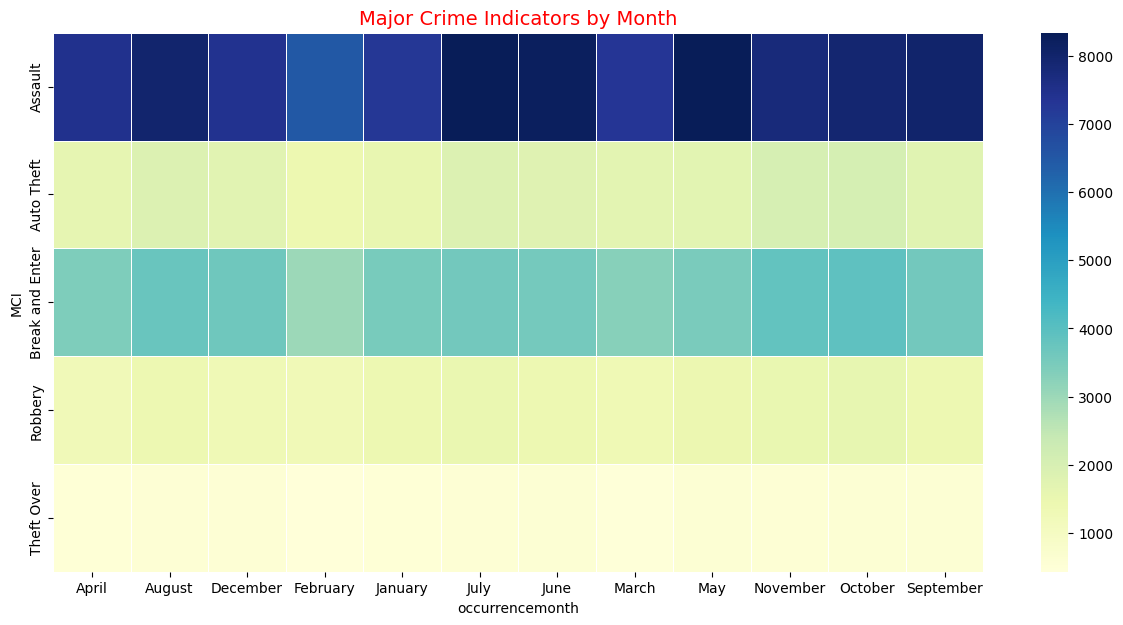

In [ ]:
import seaborn as sns
mci_monthwise = df.groupby(['occurrencemonth','MCI'],as_index=False).agg({'Total':'sum'})

plt.figure(figsize=(15, 7))
crime_count = mci_monthwise.pivot(index="MCI",columns="occurrencemonth",values="Total" )

plt.yticks(rotation=1)
ax = sns.heatmap(crime_count,cmap="YlGnBu", linewidths=.5)
plt.title("Major Crime Indicators by Month",color = 'red',fontsize=14)
plt.show()

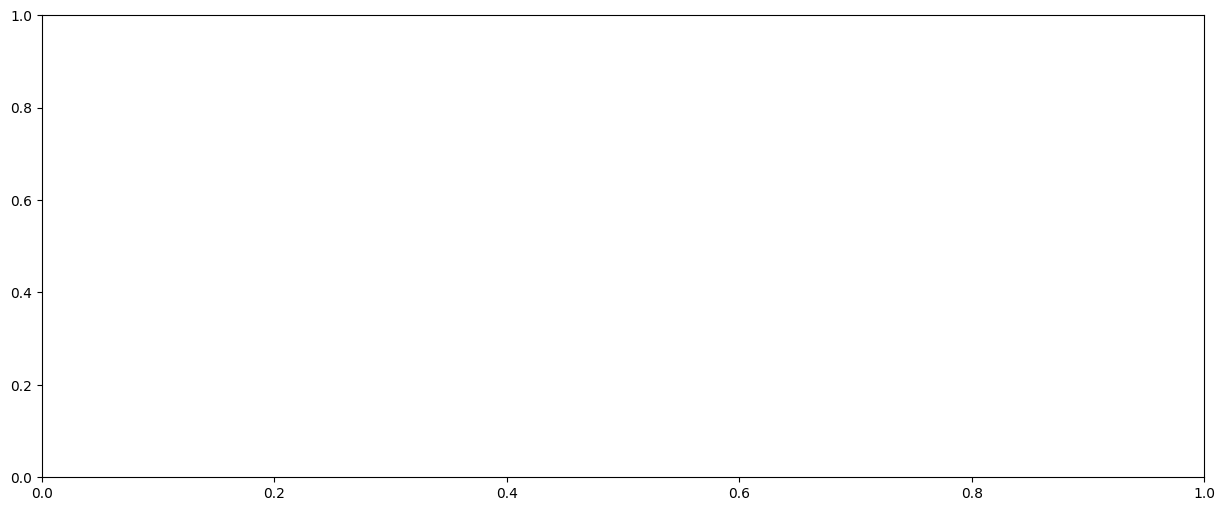

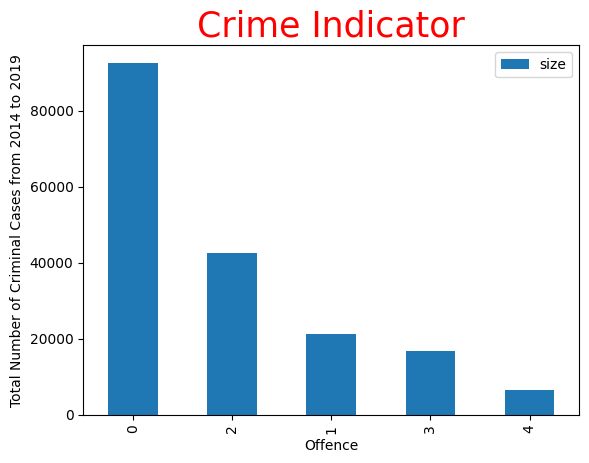

In [ ]:
major_crime_indicator = df.groupby('MCI',as_index=False).size()
plt.subplots(figsize = (15, 6))
ct = major_crime_indicator.sort_values(by='size',ascending = False)
ax = ct.plot.bar()
ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases from 2014 to 2019')
ax.set_title('Crime Indicator',color = 'red',fontsize=25)
plt.show()

Text(0.5, 1.0, 'Crime Types by Hour of Day in Toronto')

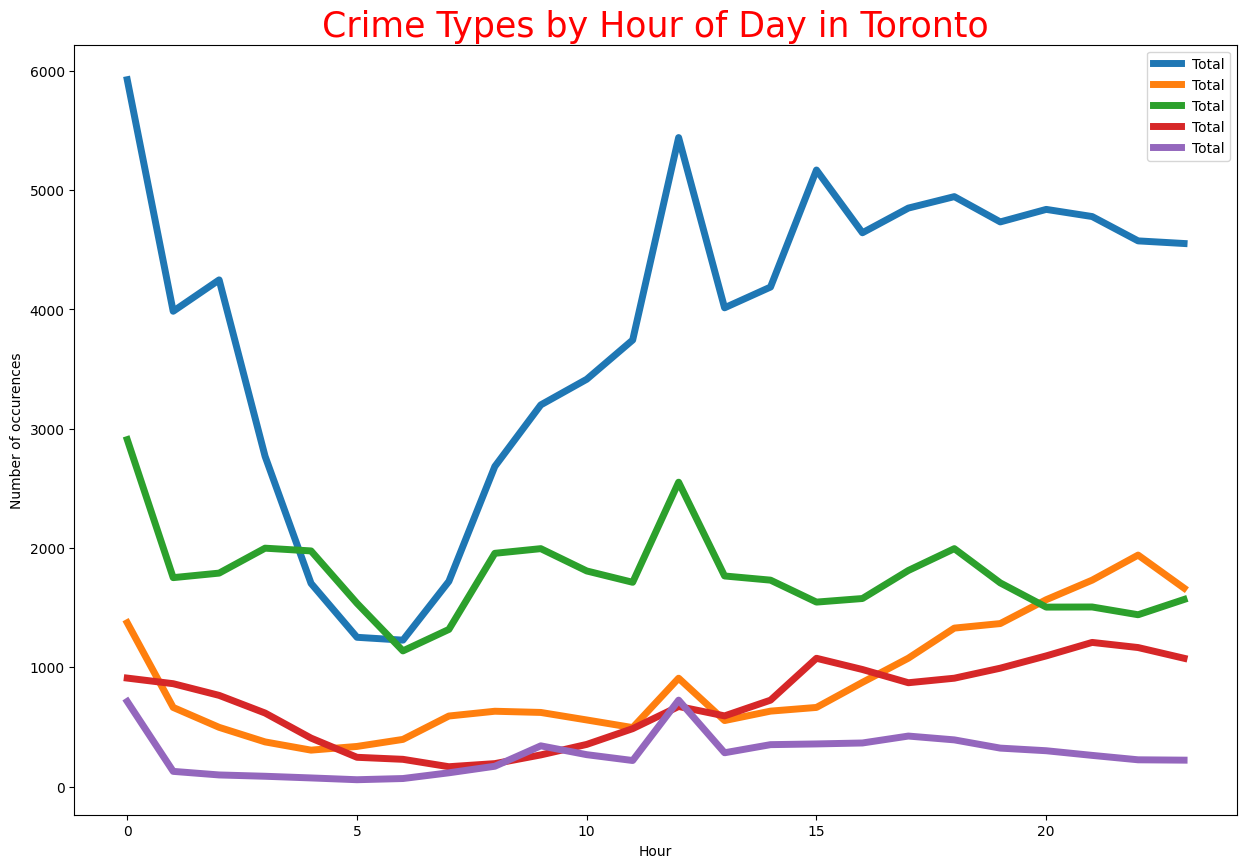

In [ ]:
hour_crime_group = df.groupby(['occurrencehour','MCI'],as_index=False).agg({'Total':'sum'})
fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('MCI').plot(x="occurrencehour", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day in Toronto',color = 'red',fontsize=25)

In [ ]:
df_g0 = df_2015.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g0 = df_g0.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g0 = df_g0.dropna()

df_g = df_2016.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g = df_g.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g = df_g.dropna()


df_g2 = df_2017.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g2 = df_g2.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g2 = df_g2.dropna()

In [ ]:
df_g0.head(10)

MCI                                 Assault  Auto Theft  Break and Enter  \
Neighbourhood                                                              
Agincourt North (129)                  57.0        26.0             51.0   
Agincourt South-Malvern West (128)     88.0        26.0             59.0   
Alderwood (20)                         37.0        15.0             26.0   
Annex (95)                            168.0        14.0            103.0   
Banbury-Don Mills (42)                 67.0        18.0             87.0   
Bathurst Manor (34)                    31.0        22.0             29.0   
Bay Street Corridor (76)              570.0        21.0            161.0   
Bayview Village (52)                   85.0        14.0             35.0   
Bayview Woods-Steeles (49)             37.0         7.0             34.0   
Bedford Park-Nortown (39)              26.0        33.0             66.0   

MCI                                 Robbery  Theft Over  
Neighbourhood                                            
Agincourt North (129)                  29.0         5.0  
Agincourt South-Malvern West (128)     15.0        11.0  
Alderwood (20)                          6.0         4.0  
Annex (95)                             28.0        18.0  
Banbury-Don Mills (42)                 12.0        15.0  
Bathurst Manor (34)                     7.0         2.0  
Bay Street Corridor (76)               76.0        37.0  
Bayview Village (52)                    4.0         8.0  
Bayview Woods-Steeles (49)              2.0         1.0  
Bedford Park-Nortown (39)               5.0        12.0

In [ ]:
scaler = StandardScaler()
Sum_of_squared_distances0 = []
Sum_of_squared_distances = []
Sum_of_squared_distances2 = []

std_scale = scaler.fit(df_g0)
df_transformed0 = std_scale.transform(df_g0)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed0)
X0 = pca.transform(df_transformed0)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed0)
    Sum_of_squared_distances0.append(km.inertia_)


std_scale = scaler.fit(df_g)
df_transformed = std_scale.transform(df_g)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

    std_scale = scaler.fit(df_g2)
df_transformed2 = std_scale.transform(df_g2)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed2)
X1 = pca.transform(df_transformed2)

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed2)
    Sum_of_squared_distances2.append(km.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.7307306081429716
For n_clusters = 3 The average silhouette_score is : 0.5841660268070628
For n_clusters = 4 The average silhouette_score is : 0.46674620493528174
For n_clusters = 5 The average silhouette_score is : 0.4557307694638797


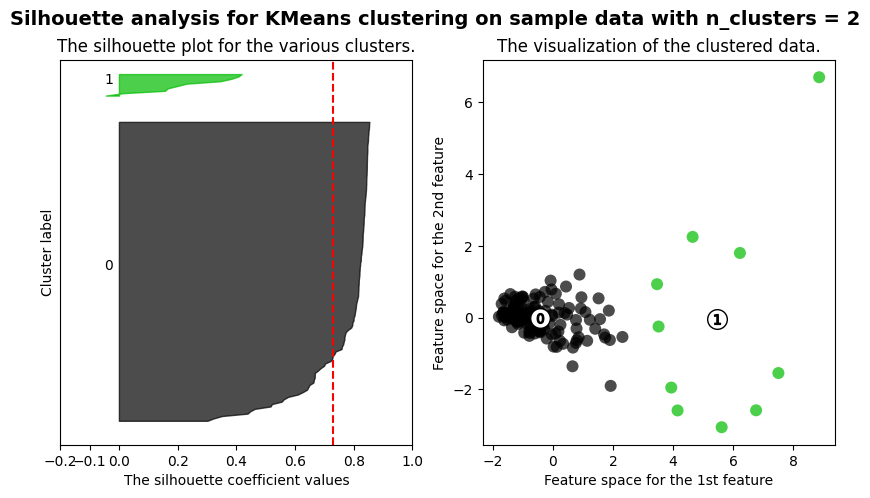

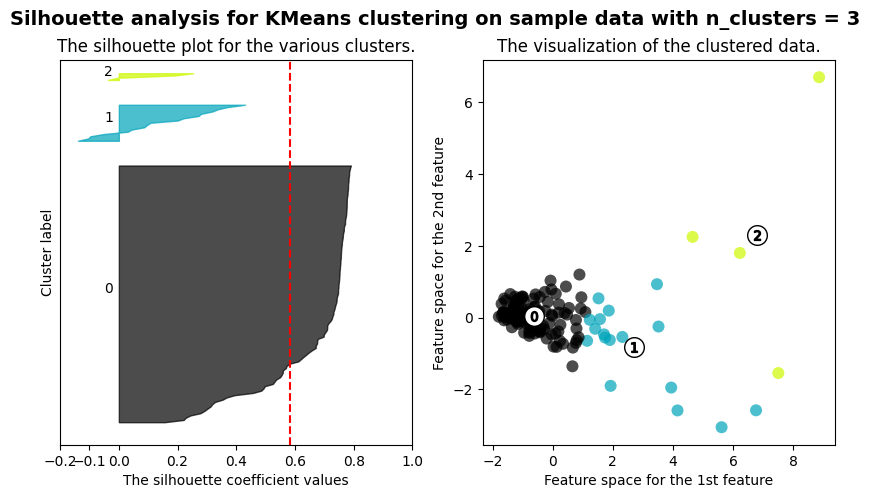

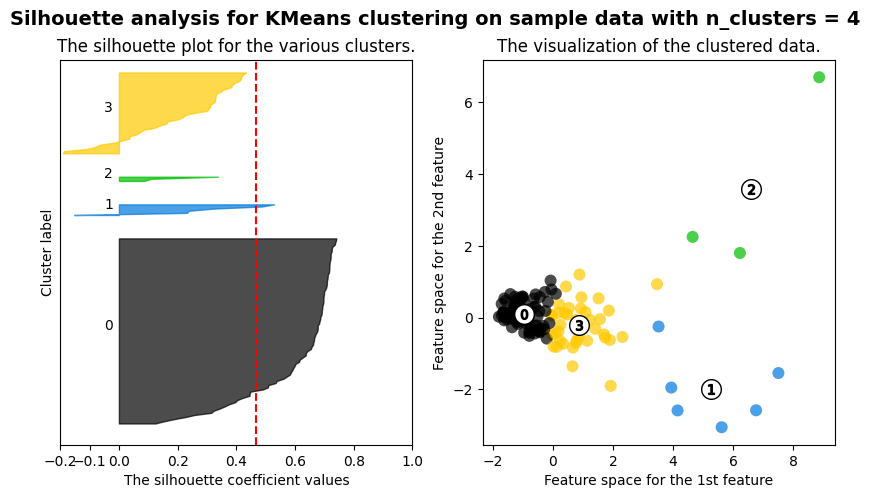

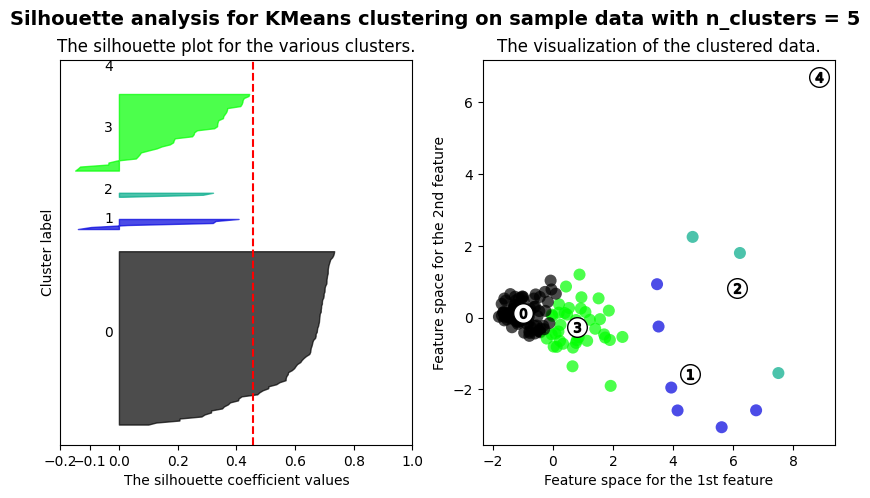

<ipython-input-23-231ec6ae6eb5>:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
<ipython-input-23-231ec6ae6eb5>:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


In [ ]:
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters , random_state=3425)
    cluster_labels = kmeans.fit_predict(X0)
    silhouette_avg = silhouette_score(X0, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X0, cluster_labels)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)


    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
       # samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        #Fixed indentation here
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Computing the new y_lower
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # showing the actual cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X0[:, 0], X0[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    #  cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
       ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

plt.show()
ax1.legend()
ax2.legend()

running time is : 0.002116064999995615


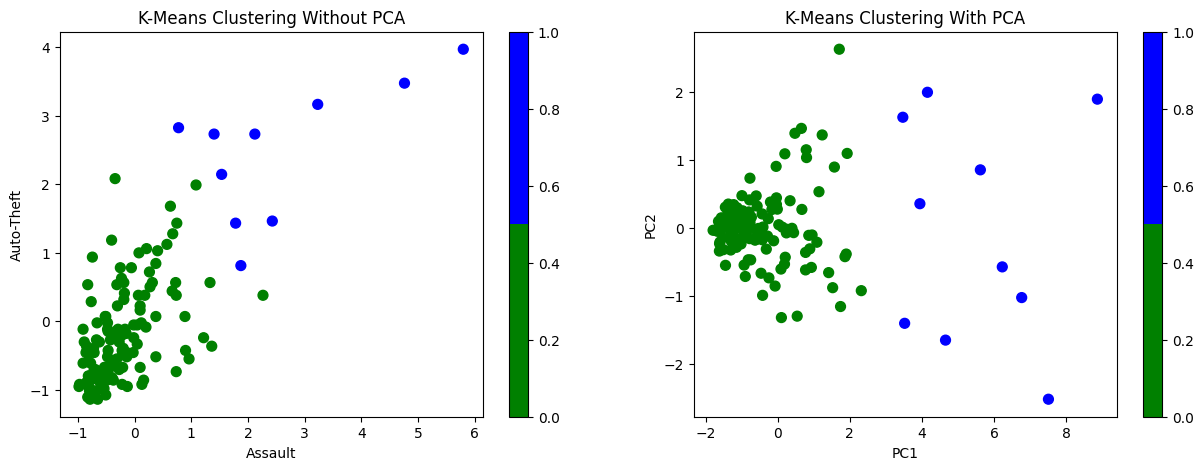

running time is : 0.0020225659999937307


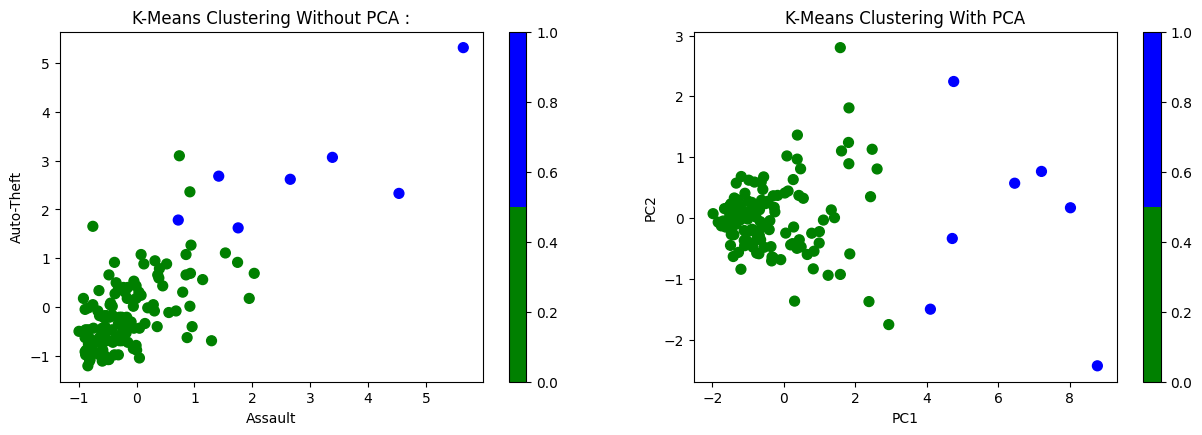

<ipython-input-24-dbbcf5391791>:93: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
<ipython-input-24-dbbcf5391791>:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


running time is : 0.0021268840000061573


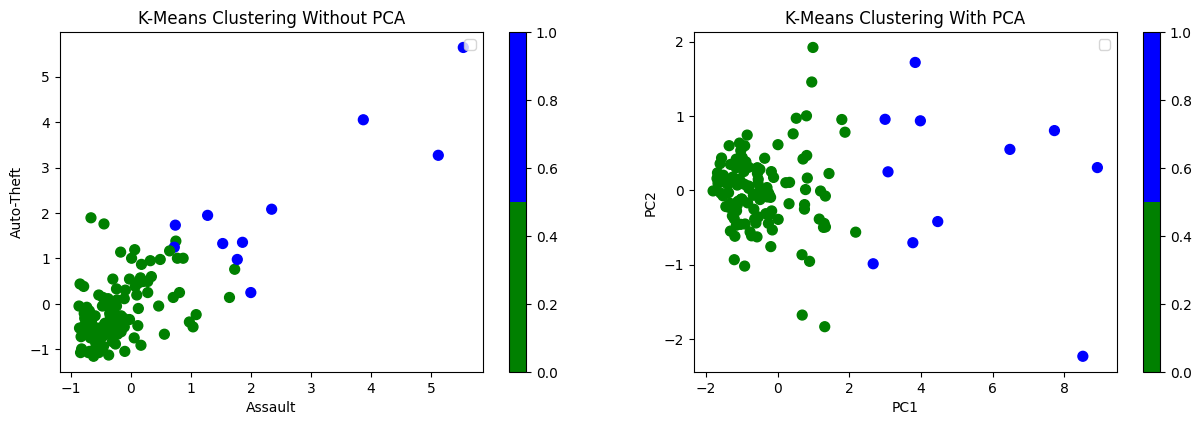

<ipython-input-24-dbbcf5391791>:112: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


In [ ]:
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=3425)
colors = ['green','blue']


plt.figure(figsize=(15, 5))

ax = plt.subplot(121)
kc =kmeans.fit(df_transformed0)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed0)
# label = label.sort_values(by=0)
df_result['label']=label

scatter = plt.scatter(df_result[0],df_result[2],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(122)
start = timeit.default_timer()
kc =kmeans.fit(X0)
stop = timeit.default_timer()
klabel0 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X0)
# klabel0 = klabel0.sort_values(by=0)
df_result['label']=klabel0
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel0.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


colors = ['green','blue']
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=342)
plt.figure(figsize=(15, 10))

ax = plt.subplot(221)

kc =kmeans.fit(df_transformed)

label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed)
label.sort_values(by=0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                       c = list(label.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA :')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)
ax = plt.subplot(222)
start = timeit.default_timer()
kc =kmeans.fit(X)
stop = timeit.default_timer()
klabel1 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X)
klabel1.sort_values(by=0)
df_result['label']=klabel1
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel1.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=342)
plt.figure(figsize=(15, 15))
ax = plt.subplot(321)
kc =kmeans.fit(df_transformed2)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed2)
label.sort_values(by=0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(label.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)
ax.legend()

ax = plt.subplot(322)
start = timeit.default_timer()
kc =kmeans.fit(X1)
stop = timeit.default_timer()
klabel2 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X1)
klabel2.sort_values(by=0)
df_result['label']=klabel2
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel2.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
ax.legend()
plt.show()
ax.legend()

In [ ]:
X_list = [X0, X, X1]
year_list = [2015,2016,2017]
for i,y in zip(X_list,year_list):
    from sklearn import metrics
    clustering = KMeans(n_clusters=2,random_state=3425).fit(i)
    labels = clustering.labels_
    print("Silhouette score(K-means) for year",y,"is",metrics.silhouette_score(i, labels, metric='euclidean'))

Silhouette score(K-means) for year 2015 is 0.7307306081429716
Silhouette score(K-means) for year 2016 is 0.7516165973715112
Silhouette score(K-means) for year 2017 is 0.8128068146265719


In [ ]:
neighborhoods0 = df_g0.index
neighborhoods0 = np.array(neighborhoods0)

neighborhoods = df_g.index
neighborhoods = np.array(neighborhoods)

neighborhoods2 = df_g2.index
neighborhoods2 = np.array(neighborhoods2)
#Display Neighboorhoods
print('Crime Neighborhoods by K-Means in 2015')
print(neighborhoods0[np.where(klabel0[0]==1)])
kviolent15 = neighborhoods0[np.where(klabel0[0]==1)]
kviolent15s = neighborhoods0[np.where(klabel0[0]==0)]
kviolent15m = neighborhoods0[np.where(klabel0[0]==2)]

print('Crime Neighborhoods by K-Means in 2016')
print(neighborhoods[np.where(klabel1[0]==1)])
kviolent16 = neighborhoods[np.where(klabel1[0]==1)]
kviolent16s = neighborhoods[np.where(klabel1[0]==0)]
kviolent16m = neighborhoods[np.where(klabel1[0]==2)]


print('Crime Neighborhoods by K-Means in 2017')
print(neighborhoods2[np.where(klabel2[0]==1)])
kviolent17 = neighborhoods2[np.where(klabel2[0]==1)]
kviolent17s = neighborhoods2[np.where(klabel2[0]==0)]
kviolent17m = neighborhoods2[np.where(klabel2[0]==2)]

Crime Neighborhoods by K-Means in 2015
['Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Downsview-Roding-CFB (26)' 'Islington-City Centre West (14)'
 'Kensington-Chinatown (78)' 'Moss Park (73)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)' 'York University Heights (27)']
Crime Neighborhoods by K-Means in 2016
['Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Moss Park (73)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'York University Heights (27)']
Crime Neighborhoods by K-Means in 2017
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Downsview-Roding-CFB (26)' 'Islington-City Centre West (14)'
 'Kensington-Chinatown (78)' 'Moss Park (73)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)' 'York University Heights (27)']


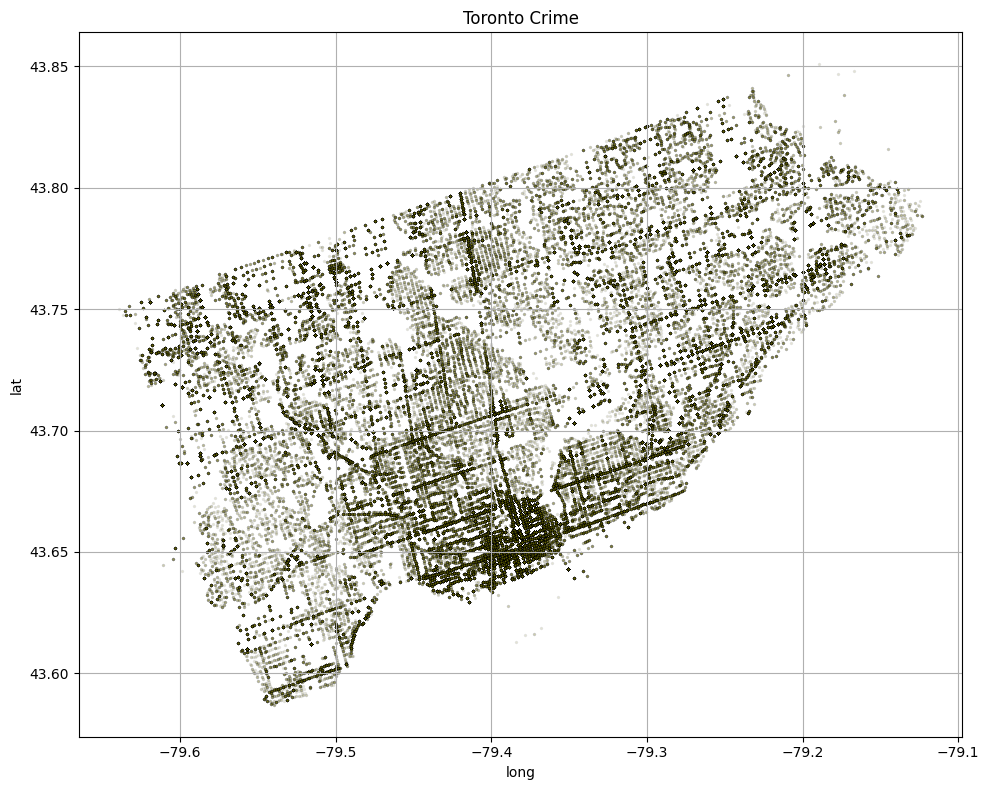

In [ ]:
plt.figure(num=None, figsize=(10, 8))
plt.scatter("Long", "Lat", data = df, c = 'y',alpha = 0.1, edgecolor = 'black', s=2)
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Toronto Crime')
plt.tight_layout()
plt.axis('tight')

plt.show()

In [ ]:
!pip install prophet


In [ ]:
import warnings
import itertools

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import statsmodels.api as sm
from sklearn.metrics import r2_score
from prophet import Prophet


In [ ]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = (30,6)
matplotlib.rcParams['axes.titlesize']= 20

In [ ]:
def mapperDictGenerator(df, label):
  d= dict()
  factorized= pd.factorize(df[label])
  for i, _ in enumerate(factorized[1]):
    d[i]= _
  return factorized[0], d

In [ ]:
df=pd.read_csv('/content/Crime_dataset_2014-2019 mitigating crime.csv')
df.head()

X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.405228  43.656982    7801  GO-20152165447  2015-12-18T03:58:00.000Z   
1 -79.307907  43.778732    7802  GO-20151417245  2015-08-15T21:45:00.000Z   
2 -79.225029  43.765942    7803  GO-20151421107  2015-08-16T16:00:00.000Z   
3 -79.140823  43.778648    7804  GO-20152167714  2015-11-26T13:00:00.000Z   
4 -79.288361  43.691235    7805  GO-20152169954  2015-12-18T19:50:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  offence  ...  \
0  2015-12-18T03:59:00.000Z  Commercial      1430      100  Assault  ...   
1  2015-08-17T22:11:00.000Z  Commercial      1430      100  Assault  ...   
2  2015-08-18T14:40:00.000Z   Apartment      2120      200      B&E  ...   
3  2015-12-18T13:38:00.000Z       Other      2120      200      B&E  ...   
4  2015-12-18T19:55:00.000Z  Commercial      1430      100  Assault  ...   

   occurrencedayofyear occurrencedayofweek  occurrencehour              MCI  \
0                352.0          Friday                   3          Assault   
1                227.0          Saturday                21          Assault   
2                228.0          Sunday                  16  Break and Enter   
3                330.0          Thursday                13  Break and Enter   
4                352.0          Friday                  19          Assault   

  Division  Hood_ID                 Neighbourhood       Long        Lat  \
0      D14       79               University (79) -79.405228  43.656982   
1      D42      118  Tam O'Shanter-Sullivan (118) -79.307907  43.778732   
2      D43      137                  Woburn (137) -79.225029  43.765942   
3      D43      133  Centennial Scarborough (133) -79.140823  43.778648   
4      D55       61            Taylor-Massey (61) -79.288361  43.691235   

   ObjectId  
0      7001  
1      7002  
2      7003  
3      7004  
4      7005  

[5 rows x 29 columns]

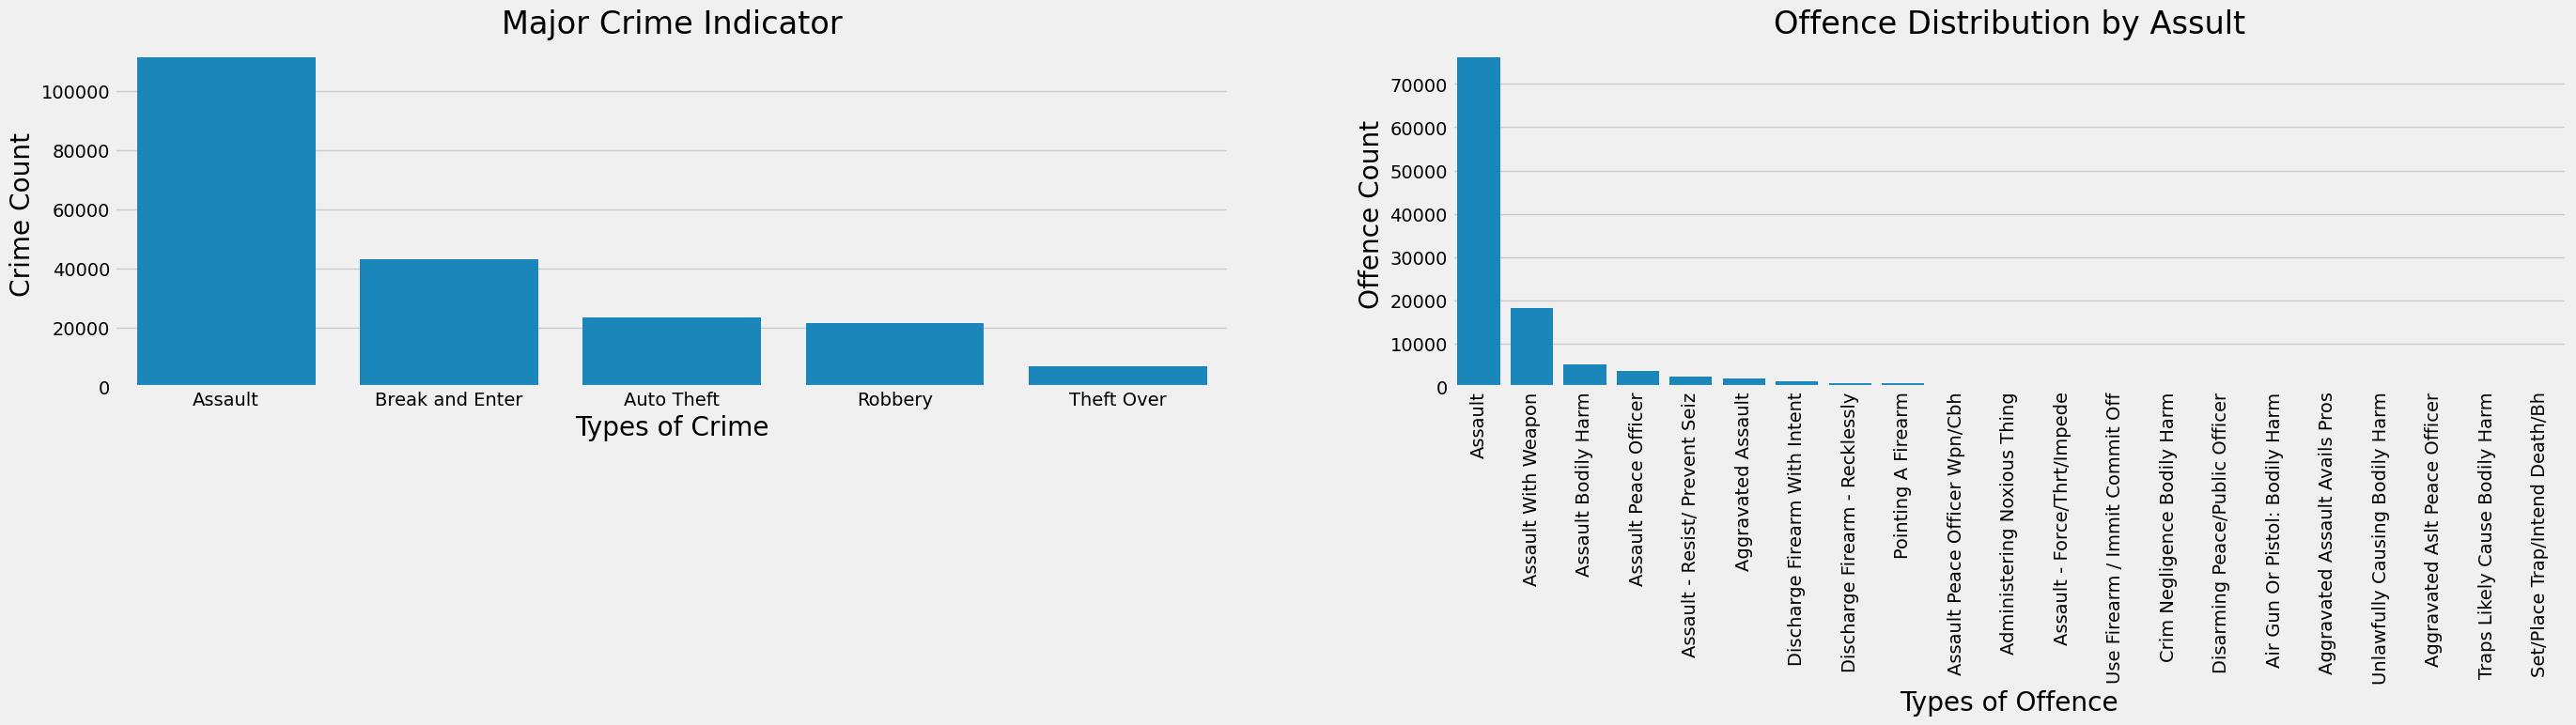

In [ ]:
plt.figure(figsize=(30,10))
MCI= df.groupby('MCI',as_index=False).size()
assaultTypes= df[df.MCI=='Assault'].groupby('offence', as_index=False).size()
autoTheftTypes= df[df.MCI=='Auto Theft'].groupby('offence', as_index=False).size()

plt.subplot(221)
sns.barplot(x='MCI', y='size', data=MCI.sort_values(by='size', ascending=False))
plt.title('Major Crime Indicator', fontsize='xx-large')
plt.xlabel('Types of Crime', fontsize='x-large')
plt.ylabel('Crime Count', fontsize='x-large')

plt.subplot(222)
sns.barplot(x='offence', y='size', data=assaultTypes.sort_values(by='size', ascending=False))
plt.title('Offence Distribution by Assult', fontsize='xx-large')
plt.xlabel('Types of Offence', fontsize='x-large')
plt.ylabel('Offence Count', fontsize='x-large')
plt.xticks(rotation=90)



plt.show()

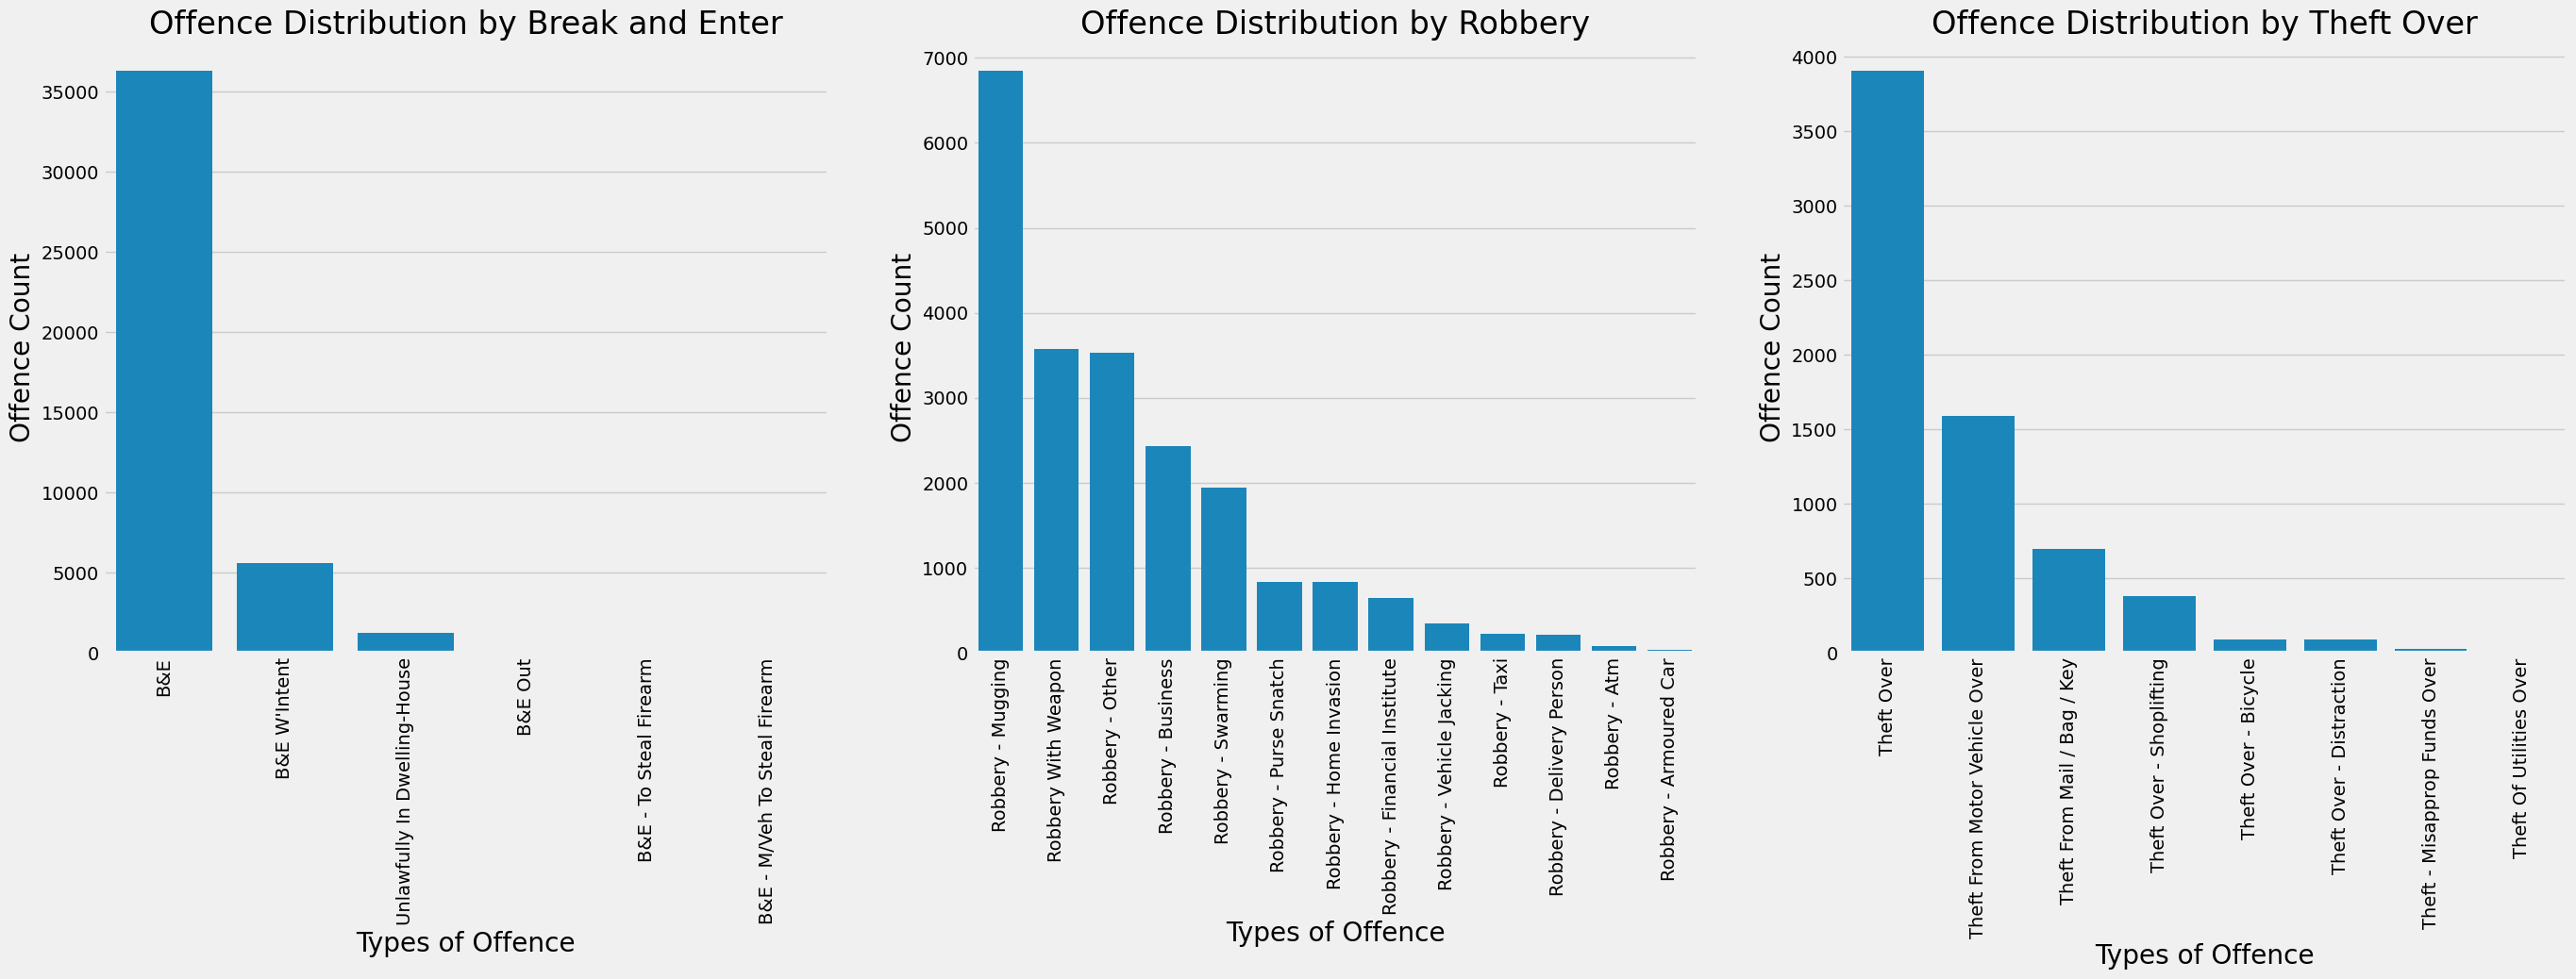

In [ ]:
plt.figure(figsize=(30,8))

breakEnterTypes= df[df.MCI=='Break and Enter'].groupby('offence', as_index=False).size()
robberyTypes= df[df.MCI=='Robbery'].groupby('offence', as_index=False).size()
theftOverTypes= df[df.MCI=='Theft Over'].groupby('offence', as_index=False).size()

plt.subplot(131)
sns.barplot(x='offence', y='size', data=breakEnterTypes.sort_values(by='size', ascending=False))
plt.title('Offence Distribution by Break and Enter', fontsize='xx-large')
plt.xlabel('Types of Offence', fontsize='x-large')
plt.ylabel('Offence Count', fontsize='x-large')
plt.xticks(rotation=90)

plt.subplot(132)
sns.barplot(x='offence', y='size', data=robberyTypes.sort_values(by='size', ascending=False))
plt.title('Offence Distribution by Robbery', fontsize='xx-large')
plt.xlabel('Types of Offence', fontsize='x-large')
plt.ylabel('Offence Count', fontsize='x-large')
plt.xticks(rotation=90)

plt.subplot(133)
sns.barplot(x='offence', y='size', data=theftOverTypes.sort_values(by='size', ascending=False))
plt.title('Offence Distribution by Theft Over', fontsize='xx-large')
plt.xlabel('Types of Offence', fontsize='x-large')
plt.ylabel('Offence Count', fontsize='x-large')
plt.xticks(rotation=90)

plt.show()

In [ ]:
df['reporteddate'] = pd.to_datetime(df['reporteddate'])
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])

df['reportOnlyDate'] = df['reporteddate'].dt.date
df['occurrenceOnlyDate'] = df['occurrencedate'].dt.date

# Convert the date columns back to datetime format before subtracting
df['delayInReporting'] = (pd.to_datetime(df['reportOnlyDate']) - pd.to_datetime(df['occurrenceOnlyDate'])).dt.days



# **Time Series Forcasting** Problem and Multipath Approach
## Time Series Analysis for **Total Crime Count**

In [ ]:
df['count']= 1
mci_monthwise = df.groupby(['occurrenceday','MCI'],as_index=False).agg({'count':'sum'})

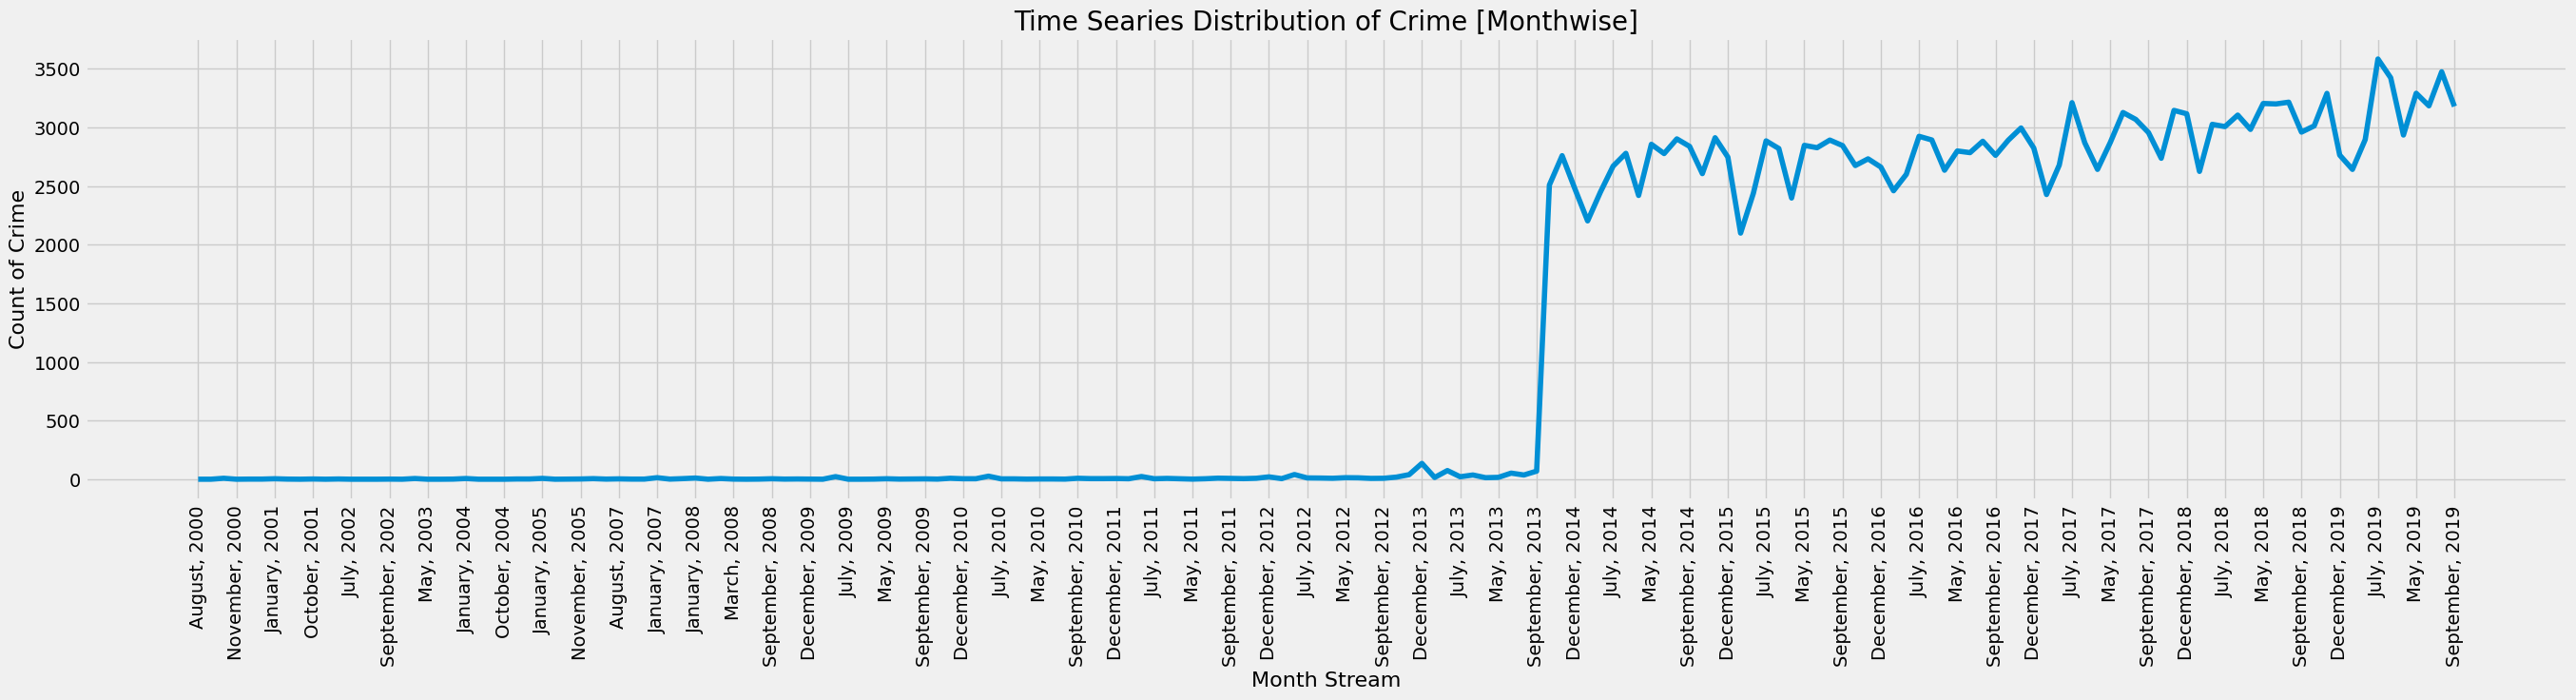

In [ ]:
mci_distribution = df.groupby(['occurrenceyear','occurrencemonth'],as_index=False).agg({'count':'sum'})
mci_distribution['occurrenceyear']= mci_distribution['occurrenceyear'].astype('int').astype('str')
mci_distribution['monthYear']= mci_distribution['occurrencemonth'] +', '+ mci_distribution['occurrenceyear']

plt.grid('on')
plt.plot(mci_distribution['monthYear'], mci_distribution['count'])
plt.xlabel('Month Stream')
plt.ylabel('Count of Crime')
plt.title('Time Searies Distribution of Crime [Monthwise]')
plt.xticks(np.arange(0, mci_distribution['monthYear'].shape[0], 3), rotation=90)
plt.show()

In [ ]:
occuranceDateVsMciCount= df.groupby(['occurrenceOnlyDate','MCI'],as_index=False).agg({'count':'sum'})
trimmedOccuranceDateVsMciCount= occuranceDateVsMciCount[occuranceDateVsMciCount.occurrenceOnlyDate > pd.to_datetime('2014-12-31').date()]

# occuranceDateCount= df.groupby(['occurrenceOnlyDate'],as_index=False).agg({'count':'sum'})

In [ ]:
occuranceDateCount= df.groupby('occurrenceOnlyDate')['count'].sum().reset_index()
trimmedOccuranceDateCount= occuranceDateCount[occuranceDateCount.occurrenceOnlyDate > pd.to_datetime('2014-12-31').date()]
trimmedOccuranceDateCount['occurrenceOnlyDate']= pd.to_datetime(trimmedOccuranceDateCount.occurrenceOnlyDate)
trimmedOccuranceDateCount.set_index('occurrenceOnlyDate', inplace=True)

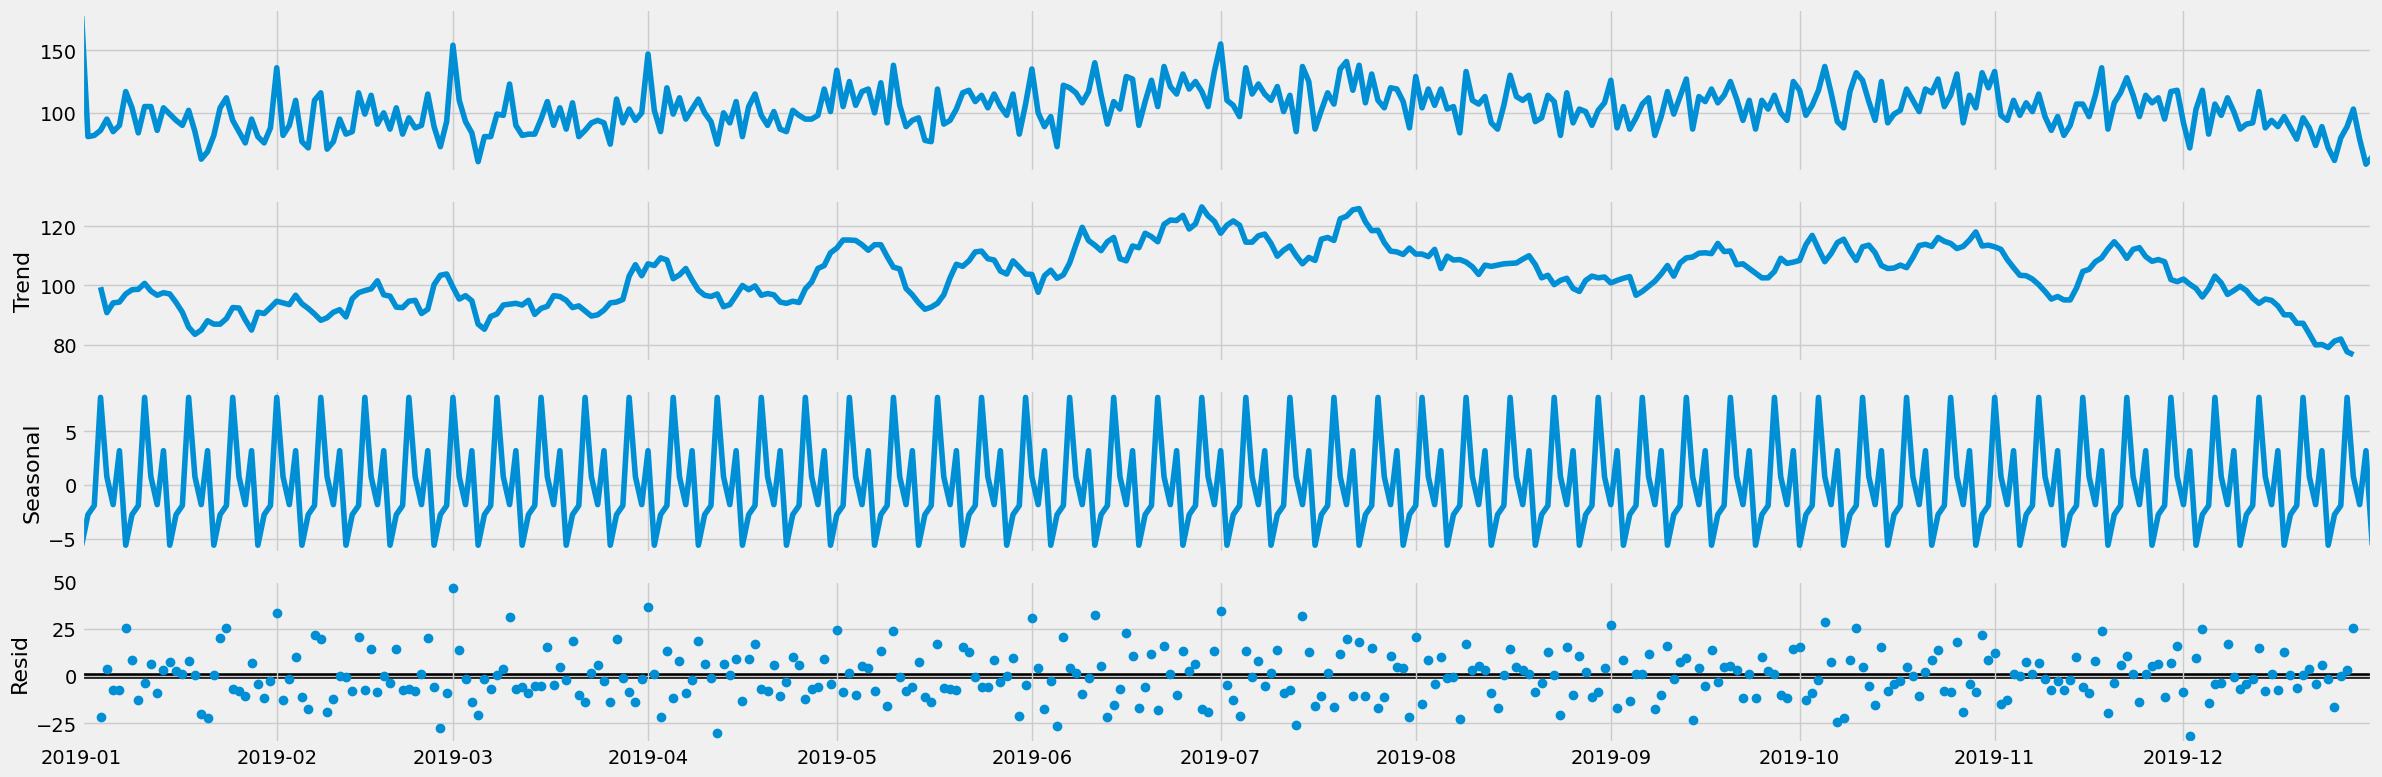

In [ ]:
decomposition= sm.tsa.seasonal_decompose(trimmedOccuranceDateCount[trimmedOccuranceDateCount.index > pd.to_datetime('2018-12-31')], model='additive')

plt.rcParams['figure.figsize'] = 24, 8
decomposition.plot()

plt.show()

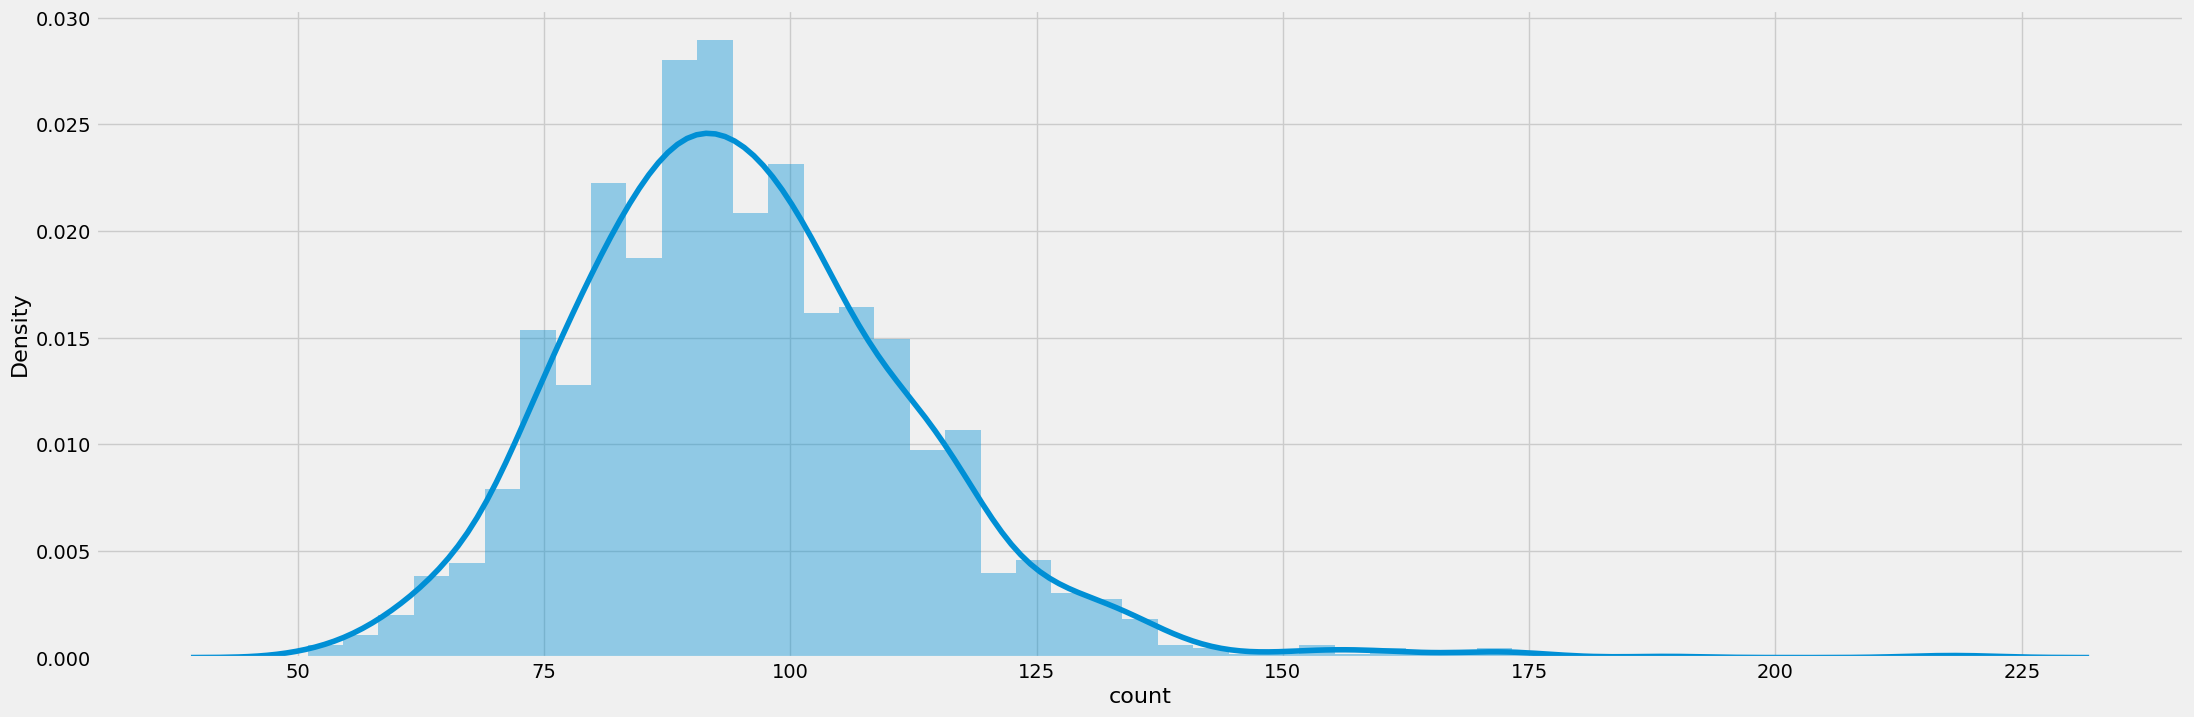

In [ ]:
sns.distplot(trimmedOccuranceDateCount['count'])
plt.show()

In [ ]:
trainData= trimmedOccuranceDateCount[trimmedOccuranceDateCount.index < pd.to_datetime('2018-12-31')]
testData= trimmedOccuranceDateCount[trimmedOccuranceDateCount.index > pd.to_datetime('2018-12-31')]

y= trimmedOccuranceDateCount['count'].resample('MS').mean()

 **SARIMA** Time Series Forcasting

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

resultDict= dict()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod= sm.tsa.statespace.SARIMAX(trainData, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results= mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            resultDict['ARIMA{}x{}12'.format(param, param_seasonal)]= results.aic
        except:
            continue

minIndexARIMA= list(resultDict.keys())[(list(resultDict.values()).index(min(resultDict.values())))]
print('MIN INDEX: {}'.format(minIndexARIMA))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:17416.567419692547
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:15834.289307207691
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:13080.942401398419
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:12173.566337827888
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:13114.613248496138
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:12239.617844055882
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:12664.253674635018
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:12173.585890976678
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:15918.053941883983
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:14988.462581171836
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:13056.045382029977
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:12125.886753981578
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:13093.041692775849
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:12192.606356338176
ARIMA(0, 0, 1)x(1, 

In [ ]:
crimeforecast=results.forecast(steps=365)[0]
testData


count
occurrenceOnlyDate       
2019-01-01            177
2019-01-02             81
2019-01-03             82
2019-01-04             86
2019-01-05             95
...                   ...
2019-12-27             89
2019-12-28            103
2019-12-29             79
2019-12-30             59
2019-12-31             65

[365 rows x 1 columns]

In [ ]:
SARIMAXmodel= sm.tsa.statespace.SARIMAX(trainData, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
SARIMAXresults= SARIMAXmodel.fit()
print(SARIMAXresults.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0994      0.025      3.964      0.000       0.050       0.149
ma.L1         -1.0365      0.008   -136.455      0.000      -1.051      -1.022
ma.S.L12      -1.0000     33.121     -0.030      0.976     -65.917      63.917
sigma2       234.1510   7755.655      0.030      0.976    -1.5e+04    1.54e+04


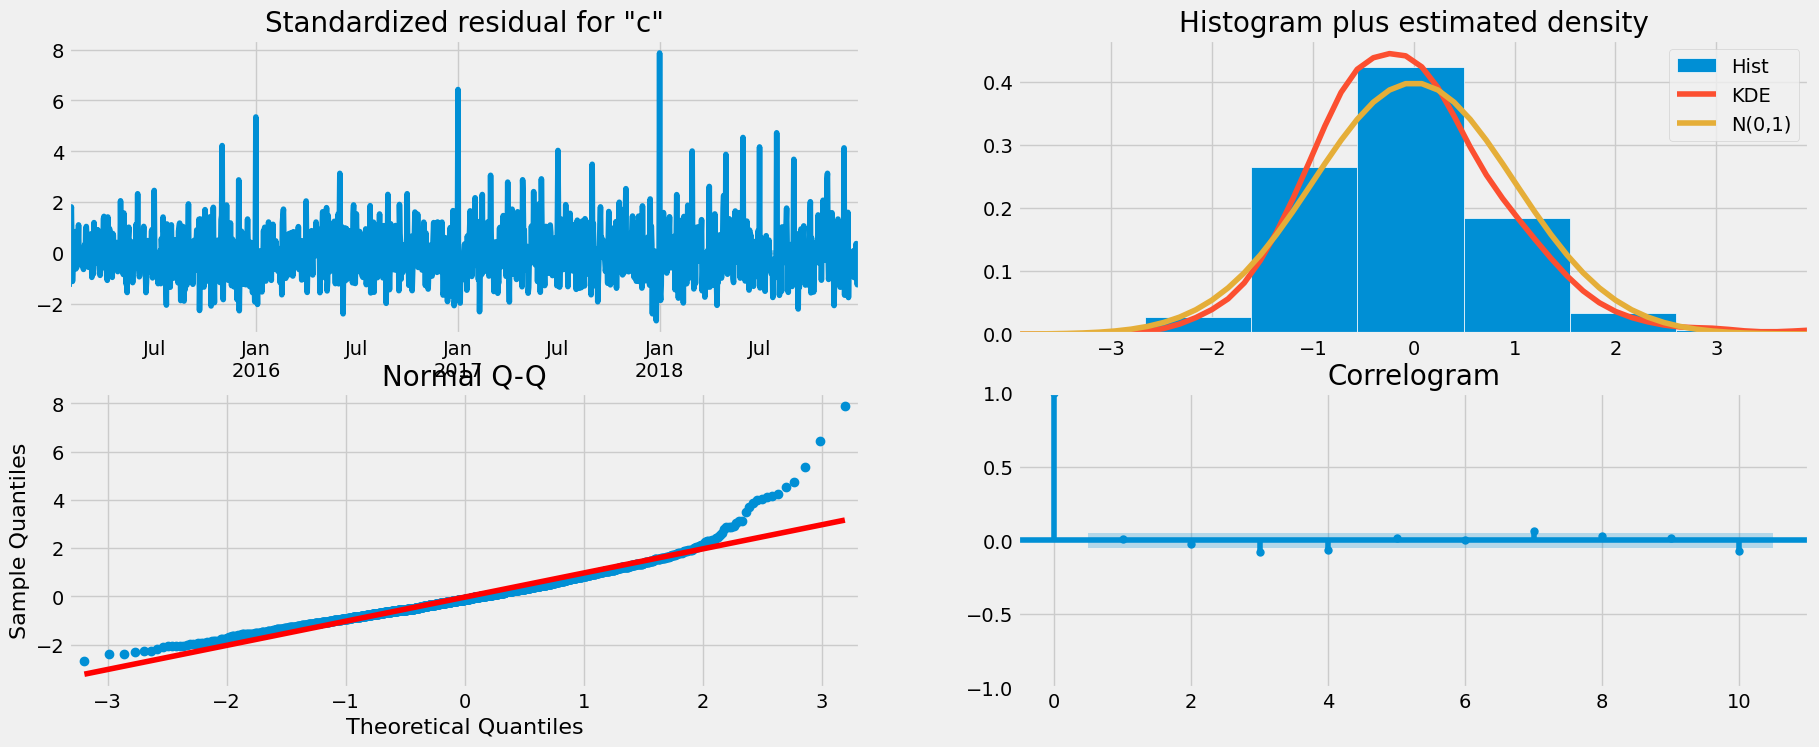

In [ ]:
SARIMAXresults.plot_diagnostics(figsize=(20, 8))
plt.show()

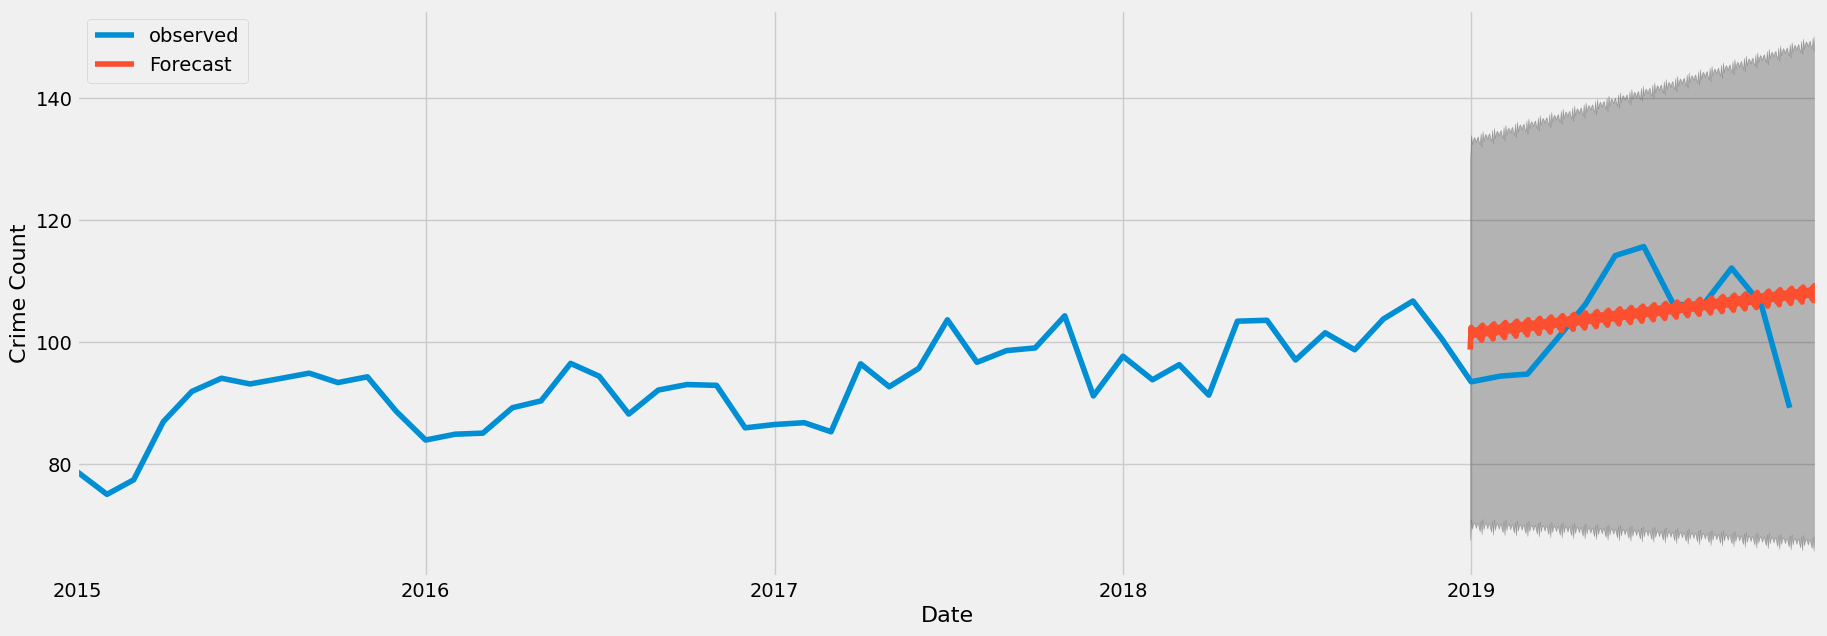

In [ ]:
pred_uc= SARIMAXresults.get_forecast(steps=365)
pred_ci= pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(20, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crime Count')
plt.legend()
plt.show()

In [ ]:
testData['predValues']= pred_uc.predicted_mean.astype('int')

testData['lowerCount']= pred_ci[pred_ci.index >= testData.index.min()]['lower count']
testData['upperCount']= pred_ci[pred_ci.index >= testData.index.min()]['upper count']

mse= round(((testData['count'] - testData['predValues'])**2).mean(), 2)
rmse= round(np.sqrt(mse), 2)
ubmse= round(((testData['upperCount'] - testData['count'])**2).mean(), 2)
ubrmse= round(np.sqrt(ubmse), 2)
lbmse= round(((testData['lowerCount'] - testData['count'])**2).mean(), 2)
lbrmse= round(np.sqrt(lbmse), 2)

print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('Mean Square Error with Upper Envelop: {}'.format(ubmse))
print('Root Mean Square Error with Upper Envelop: {}'.format(ubrmse))
print('Mean Square Error with Lower Envelop: {}'.format(lbmse))
print('Root Mean Square Error with Lower Envelop: {}'.format(lbrmse))
print()
print(testData.head())

Mean Square Error: 285.83
Root Mean Square Error: 16.91
Mean Square Error with Upper Envelop: 1707.73
Root Mean Square Error with Upper Envelop: 41.32
Mean Square Error with Lower Envelop: 1503.55
Root Mean Square Error with Lower Envelop: 38.78

                    count  predValues  lowerCount  upperCount
occurrenceOnlyDate                                           
2019-01-01            177       102.0   70.838784  133.831621
2019-01-02             81       100.0   69.308982  132.374858
2019-01-03             82       101.0   70.064415  133.179831
2019-01-04             86       101.0   70.381296  133.544135
2019-01-05             95       101.0   70.029400  133.238219


**Prophet** Time Series

In [ ]:
# Ensure required columns exist in the dataset
if 'occurrenceOnlyDate' in df.columns:
    trimmedOccuranceDateCountProphetFit = df.groupby('occurrenceOnlyDate').size().reset_index()
    trimmedOccuranceDateCountProphetFit.columns = ['ds', 'y']
else:
    print("Error: Required column 'occurrenceOnlyDate' not found in the dataset.")
    trimmedOccuranceDateCountProphetFit = pd.DataFrame(columns=['ds', 'y'])  # Create empty DataFrame

# Convert 'ds' column to datetime safely
trimmedOccuranceDateCountProphetFit['ds'] = pd.to_datetime(trimmedOccuranceDateCountProphetFit['ds'], errors='coerce')

# Drop any rows with missing values
trimmedOccuranceDateCountProphetFit = trimmedOccuranceDateCountProphetFit.dropna()

print("Dataset prepared successfully!")


Dataset prepared successfully!


In [ ]:
trimmedOccuranceDateCountProphetFit['ds'] = pd.to_datetime(trimmedOccuranceDateCountProphetFit['ds'], errors='coerce')
trimmedOccuranceDateCountProphetFit = trimmedOccuranceDateCountProphetFit.dropna()

In [ ]:
prophet_model = Prophet(daily_seasonality=False, yearly_seasonality=True)
prophet_model.fit(trimmedOccuranceDateCountProphetFit)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcntgl93a/hk6feuho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcntgl93a/otjrlm1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96793', 'data', 'file=/tmp/tmpcntgl93a/hk6feuho.json', 'init=/tmp/tmpcntgl93a/otjrlm1d.json', 'output', 'file=/tmp/tmpcntgl93a/prophet_modelz8e7vdio/prophet_model-20250417093256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
prophetForecast = prophet_model.make_future_dataframe(periods=12, freq='M')  # 12 months prediction
prophetForecast = prophet_model.predict(prophetForecast)

<Figure size 1800x600 with 0 Axes>

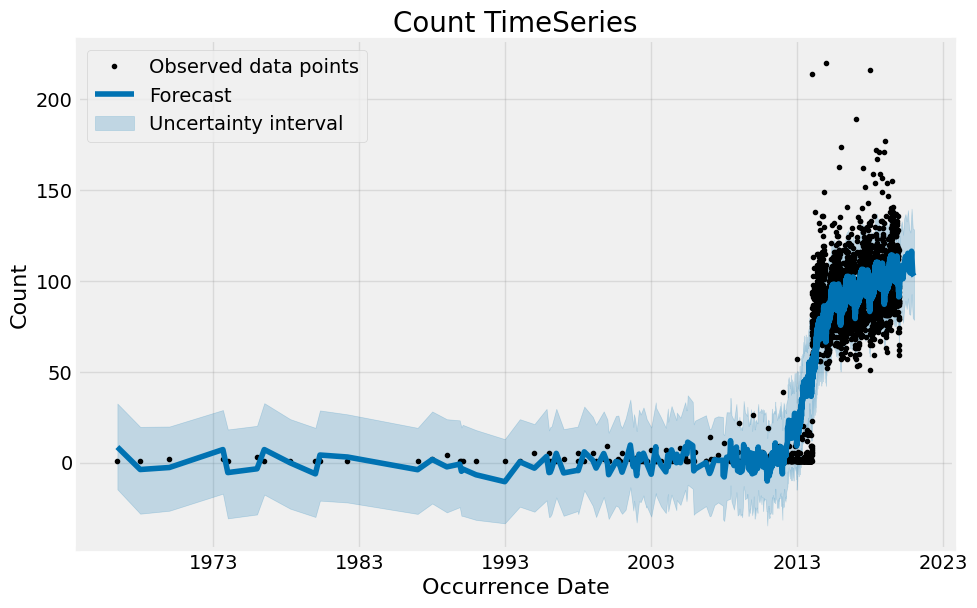

In [ ]:
plt.figure(figsize=(18, 6))
prophet_model.plot(prophetForecast, xlabel='Occurrence Date', ylabel='Count')
plt.legend()
plt.title('Count TimeSeries');

In [ ]:
prophetForcast_yhat = prophetForecast[prophetForecast.ds >= pd.to_datetime('2019-01-01')].set_index('ds').loc[:, ['yhat', 'yhat_lower', 'yhat_upper']]
prophetForcast_trend = prophetForecast[prophetForecast.ds >= pd.to_datetime('2019-01-01')].set_index('ds').loc[:, ['trend', 'trend_lower', 'trend_upper']]


In [ ]:
# Convert predictions to integers safely
for _ in tqdm(prophetForcast_yhat.columns):
    prophetForcast_yhat[_] = prophetForcast_yhat[_].round().astype('int32')

for _ in tqdm(prophetForcast_trend.columns):
    prophetForcast_trend[_] = prophetForcast_trend[_].round().astype('int32')

100%|██████████| 3/3 [00:00<00:00, 1002.22it/s]


In [ ]:
mse = round(((testData['count'] - prophetForcast_yhat['yhat'])**2).mean(), 2)
rmse = round(np.sqrt(mse), 2)
ubmse = round(((prophetForcast_yhat['yhat_upper'] - testData['count'])**2).mean(), 2)
ubrmse = round(np.sqrt(ubmse), 2)
lbmse = round(((prophetForcast_yhat['yhat_lower'] - testData['count'])**2).mean(), 2)
lbrmse = round(np.sqrt(lbmse), 2)

print('Prophet Complete yHat Data Error Analysis')
print()
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'Mean Square Error with Upper Envelop: {ubmse}')
print(f'Root Mean Square Error with Upper Envelop: {ubrmse}')
print(f'Mean Square Error with Lower Envelop: {lbmse}')
print(f'Root Mean Square Error with Lower Envelop: {lbrmse}')
print()
print(prophetForcast_yhat.head())

Prophet Complete yHat Data Error Analysis

Mean Square Error: 241.64
Root Mean Square Error: 15.54
Mean Square Error with Upper Envelop: 853.54
Root Mean Square Error with Upper Envelop: 29.22
Mean Square Error with Lower Envelop: 808.6
Root Mean Square Error with Lower Envelop: 28.44

            yhat  yhat_lower  yhat_upper
ds                                      
2019-01-01    93          68         116
2019-01-02    94          71         120
2019-01-03    97          72         119
2019-01-04   103          79         127
2019-01-05   103          79         127


In [ ]:
mse= round(((testData['predValues'] - prophetForcast_yhat['yhat'])**2).mean(), 2)
rmse= round(np.sqrt(mse), 2)
ubmse= round(((prophetForcast_yhat['yhat_upper'] - testData['upperCount'])**2).mean(), 2)
ubrmse= round(np.sqrt(ubmse), 2)
lbmse= round(((prophetForcast_yhat['yhat_lower'] - testData['lowerCount'])**2).mean(), 2)
lbrmse= round(np.sqrt(lbmse), 2)

print('Prophet vs ARIMA Forcasting Data Deviation Tendancy Analysis')
print()
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('Mean Square Error with Upper Envelop: {}'.format(ubmse))
print('Root Mean Square Error with Upper Envelop: {}'.format(ubrmse))
print('Mean Square Error with Lower Envelop: {}'.format(lbmse))
print('Root Mean Square Error with Lower Envelop: {}'.format(lbrmse))

Prophet vs ARIMA Forcasting Data Deviation Tendancy Analysis

Mean Square Error: 26.6
Root Mean Square Error: 5.16
Mean Square Error with Upper Envelop: 210.7
Root Mean Square Error with Upper Envelop: 14.52
Mean Square Error with Lower Envelop: 147.79
Root Mean Square Error with Lower Envelop: 12.16


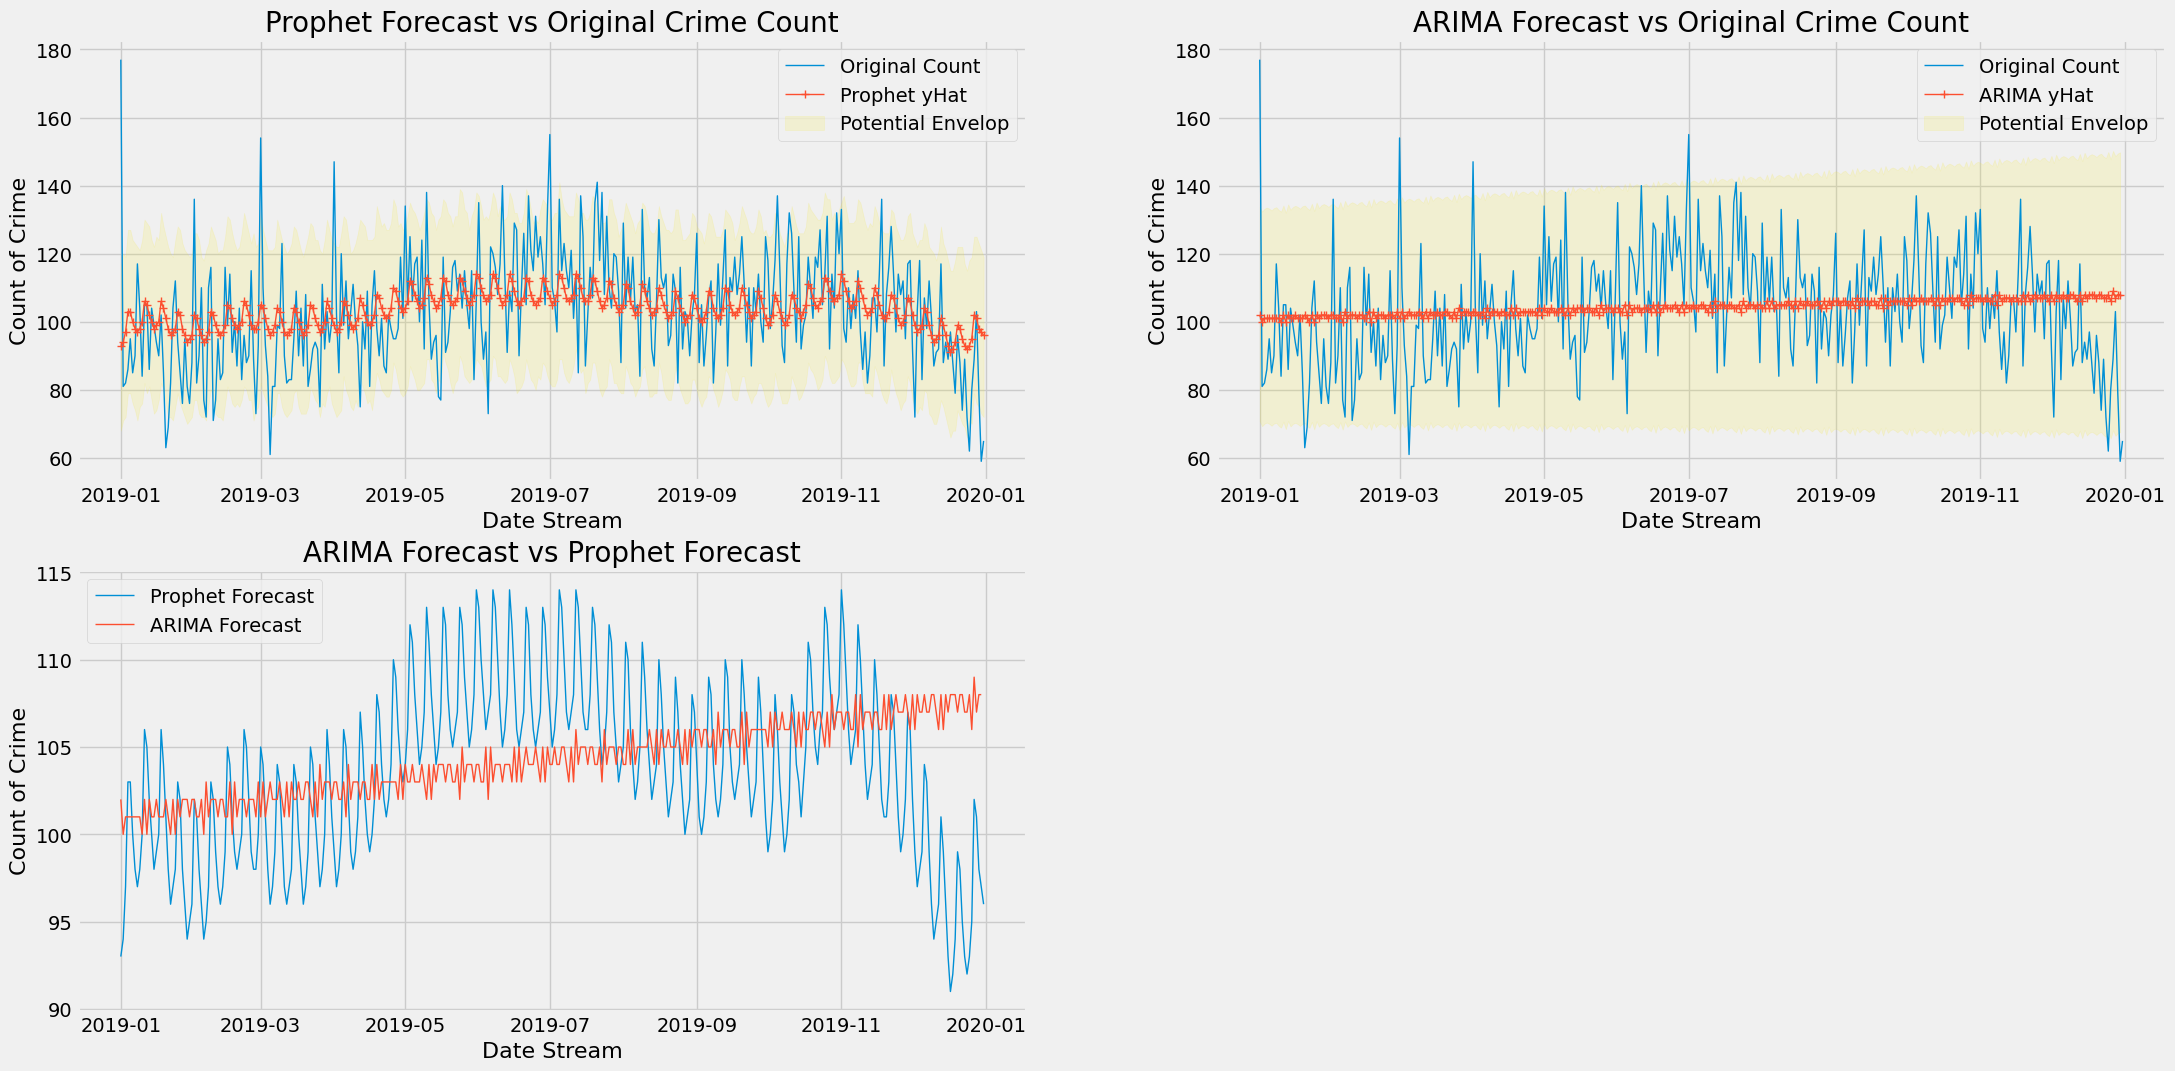

In [ ]:
plt.rcParams['figure.figsize'] = 24, 12

plt.subplot(221)
plt.grid('on')
plt.title('Prophet Forecast vs Original Crime Count')

# Ensure x and y have the same length
min_length = min(len(prophetForcast_yhat.index), len(testData['count']))
plt.plot(prophetForcast_yhat.index[:min_length], testData['count'].iloc[:min_length], lw=1)
plt.plot(prophetForcast_yhat.index[:min_length], prophetForcast_yhat['yhat'].iloc[:min_length], lw=1, marker='+')
plt.fill_between(prophetForcast_yhat.index[:min_length], prophetForcast_yhat['yhat_upper'].iloc[:min_length], prophetForcast_yhat['yhat_lower'].iloc[:min_length], color='#f7ed25', alpha=.15)

plt.xlabel('Date Stream')
plt.ylabel('Count of Crime')
plt.legend(['Original Count', 'Prophet yHat', 'Potential Envelop'])

plt.subplot(222)
plt.grid('on')
plt.title('ARIMA Forecast vs Original Crime Count')

# Ensure x and y have the same length
min_length = min(len(testData.index), len(testData['count']))
plt.plot(testData.index[:min_length], testData['count'].iloc[:min_length], lw=1)
plt.plot(testData.index[:min_length], testData['predValues'].iloc[:min_length], lw=1, marker='+')
plt.fill_between(testData.index[:min_length], testData['upperCount'].iloc[:min_length], testData['lowerCount'].iloc[:min_length], color='#f7ed25', alpha=.15)

plt.xlabel('Date Stream')
plt.ylabel('Count of Crime')
plt.legend(['Original Count', 'ARIMA yHat', 'Potential Envelop'])

plt.subplot(223)
plt.grid('on')
plt.title('ARIMA Forecast vs Prophet Forecast')

# Ensure x and y have the same length
min_length = min(len(prophetForcast_yhat.index), len(testData.index))
plt.plot(prophetForcast_yhat.index[:min_length], prophetForcast_yhat['yhat'].iloc[:min_length], lw=1)
plt.plot(testData.index[:min_length], testData['predValues'].iloc[:min_length], lw=1)

plt.xlabel('Date Stream')
plt.ylabel('Count of Crime')
plt.legend(['Prophet Forecast', 'ARIMA Forecast'])

plt.show()


In [ ]:
print('Different Major Crime Indicators', end='\n\n')
for i, _ in enumerate(np.unique(df.MCI)):
  print('{}. {}'.format(i, _))

  mciDifferedResult= pd.DataFrame()


Different Major Crime Indicators

0. Assault
1. Auto Theft
2. Break and Enter
3. Robbery
4. Theft Over


In [ ]:
print(df.columns)


Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Long', 'Lat', 'ObjectId', 'reportOnlyDate',
       'occurrenceOnlyDate', 'delayInReporting', 'count'],
      dtype='object')


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcntgl93a/xllm5cfl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcntgl93a/m6sofdbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94671', 'data', 'file=/tmp/tmpcntgl93a/xllm5cfl.json', 'init=/tmp/tmpcntgl93a/m6sofdbi.json', 'output', 'file=/tmp/tmpcntgl93a/prophet_modeluw55_dja/prophet_model-20250417093259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


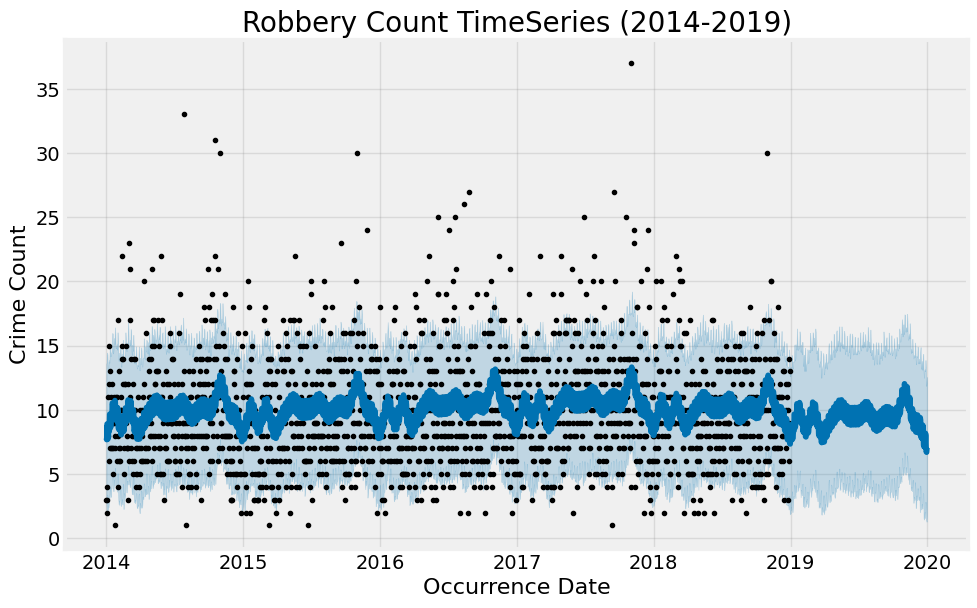

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Ensure 'occurrencedate' is in correct format
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'], errors='coerce')
df['occurrenceOnlyDate'] = df['occurrencedate'].dt.date  # Extract only date

# Ensure 'MCI' column exists and filter for 'Robbery'
if 'MCI' in df.columns:
    # Count occurrences since 'count' column does not exist
    assaultTimewiseData = df[df['MCI'] == 'Robbery'].groupby('occurrenceOnlyDate').size().reset_index(name='y')
else:
    print("Column 'MCI' not found in dataset")
    assaultTimewiseData = pd.DataFrame(columns=['occurrenceOnlyDate', 'y'])

# Rename columns for Prophet
assaultTimewiseData = assaultTimewiseData.rename(columns={'occurrenceOnlyDate': 'ds'})

# **FILTER DATA FOR 2014-2019 ONLY**
assaultTimewiseData = assaultTimewiseData[
    (assaultTimewiseData.ds >= pd.to_datetime('2014-01-01').date()) &
    (assaultTimewiseData.ds < pd.to_datetime('2019-01-01').date())
]

# Train Prophet Model
assaultProphetModel = Prophet(daily_seasonality=True)
assaultProphetModel.fit(assaultTimewiseData)

# Predict Future Crimes
assaultProphetForecast = assaultProphetModel.make_future_dataframe(periods=365)
assaultProphetForecast = assaultProphetModel.predict(assaultProphetForecast)

# Plot Results
assaultProphetModel.plot(assaultProphetForecast, xlabel='Occurrence Date', ylabel='Crime Count')
plt.title('Robbery Count TimeSeries (2014-2019)')
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcntgl93a/3thlp_ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcntgl93a/lii55jk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88753', 'data', 'file=/tmp/tmpcntgl93a/3thlp_ig.json', 'init=/tmp/tmpcntgl93a/lii55jk9.json', 'output', 'file=/tmp/tmpcntgl93a/prophet_modely7vrfrwl/prophet_model-20250417093300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


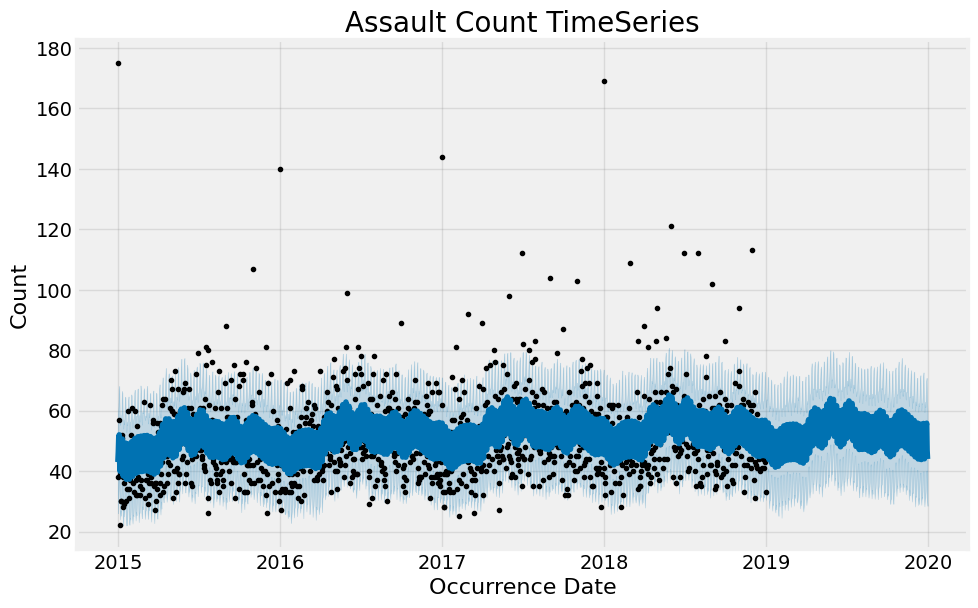

In [ ]:
assaultTimewiseData = df[df['MCI'] == 'Assault'].groupby('occurrenceOnlyDate').size().reset_index(name='count')

# Rename columns for Prophet
assaultTimewiseData = assaultTimewiseData[assaultTimewiseData['occurrenceOnlyDate'] > pd.to_datetime('2014-12-31').date()]
assaultTimewiseData = assaultTimewiseData.reset_index().rename(columns={'occurrenceOnlyDate': 'ds', 'count': 'y'})

# Drop unnecessary index column
try:
    assaultTimewiseData.drop('index', axis=1, inplace=True)
except:
    pass


assaultProphetModel= Prophet(daily_seasonality=True).fit(assaultTimewiseData[assaultTimewiseData.ds < pd.to_datetime('2019-01-01').date()])
assaultProphetForecast= assaultProphetModel.make_future_dataframe(periods=365)
assaultProphetForecast= assaultProphetModel.predict(assaultProphetForecast)

assaultProphetModel.plot(assaultProphetForecast, xlabel = 'Occurrence Date', ylabel = 'Count')
plt.title('Assault Count TimeSeries');

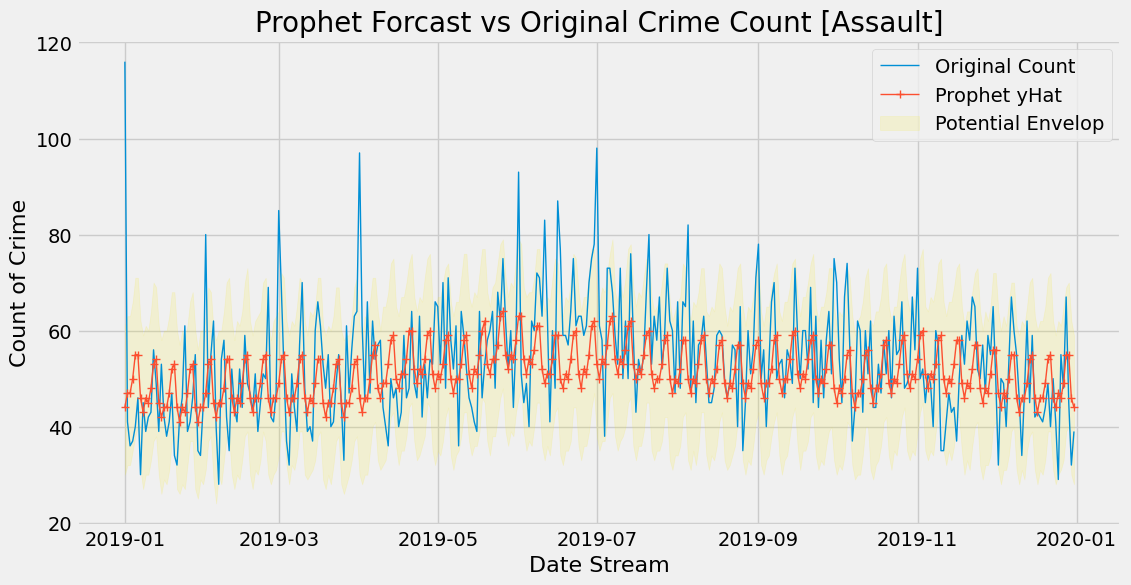

In [ ]:
comparableData= assaultTimewiseData[assaultTimewiseData.ds >= pd.to_datetime('2019-01-01').date()]
comparableData['yhat']= assaultProphetForecast['yhat'].astype('int')
comparableData['yhatLower']= assaultProphetForecast['yhat_lower'].astype('int')
comparableData['yhatUpper']= assaultProphetForecast['yhat_upper'].astype('int')

mciDifferedResult['Assault']= comparableData.yhat
mciDifferedResult['lower']= comparableData.yhatLower
mciDifferedResult['upper']= comparableData.yhatUpper

plt.rcParams['figure.figsize']= 12,6

plt.grid('on')
plt.title('Prophet Forcast vs Original Crime Count [Assault]')
plt.plot(comparableData.ds, comparableData['y'], lw=1)
plt.plot(comparableData.ds, comparableData['yhat'], lw=1, marker='+')
plt.fill_between(comparableData.ds, comparableData['yhatUpper'], comparableData['yhatLower'], color='#f7ed25', alpha=.15)
plt.xlabel('Date Stream')
plt.ylabel('Count of Crime')
plt.legend(['Original Count', 'Prophet yHat', 'Potential Envelop'])
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcntgl93a/f25hf5ob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcntgl93a/rixw8isq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93309', 'data', 'file=/tmp/tmpcntgl93a/f25hf5ob.json', 'init=/tmp/tmpcntgl93a/rixw8isq.json', 'output', 'file=/tmp/tmpcntgl93a/prophet_modelie_6k6j8/prophet_model-20250417093302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:33:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


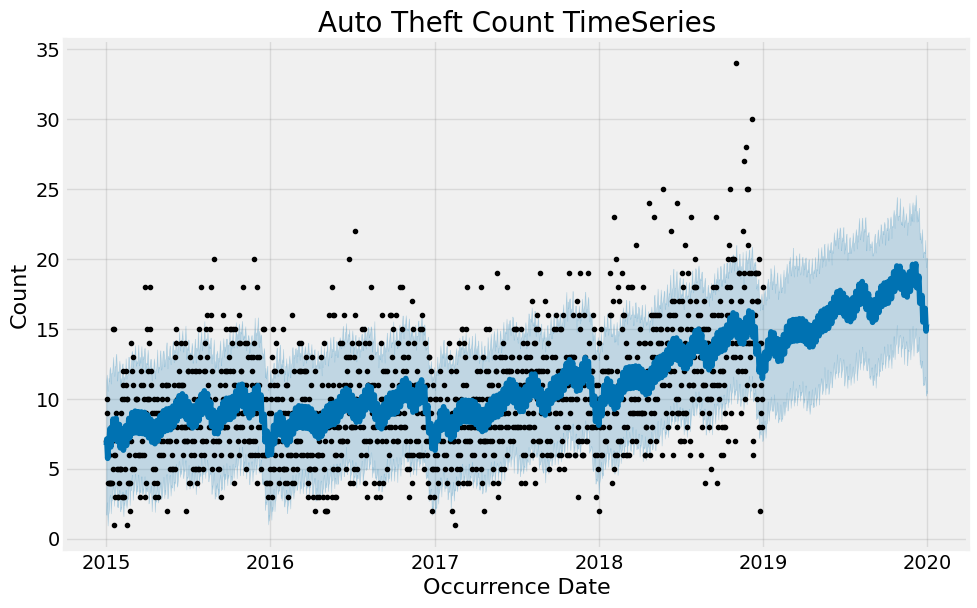

In [ ]:
# Fix: Use .size() instead of a non-existing 'count' column
autoTheftTimewiseData = df[df['MCI'] == 'Auto Theft'].groupby('occurrenceOnlyDate').size().reset_index(name='count')

# Rename columns for Prophet
autoTheftTimewiseData = autoTheftTimewiseData[autoTheftTimewiseData['occurrenceOnlyDate'] > pd.to_datetime('2014-12-31').date()]
autoTheftTimewiseData = autoTheftTimewiseData.reset_index().rename(columns={'occurrenceOnlyDate': 'ds', 'count': 'y'})

# Drop unnecessary index column
try:
    autoTheftTimewiseData.drop('index', axis=1, inplace=True)
except:
    pass


autoTheftProphetModel= Prophet(daily_seasonality=True).fit(autoTheftTimewiseData[autoTheftTimewiseData.ds < pd.to_datetime('2019-01-01').date()])
autoTheftProphetForecast= autoTheftProphetModel.make_future_dataframe(periods=365)
autoTheftProphetForecast= autoTheftProphetModel.predict(autoTheftProphetForecast)


autoTheftProphetModel.plot(autoTheftProphetForecast, xlabel = 'Occurrence Date', ylabel = 'Count')
plt.title('Auto Theft Count TimeSeries');

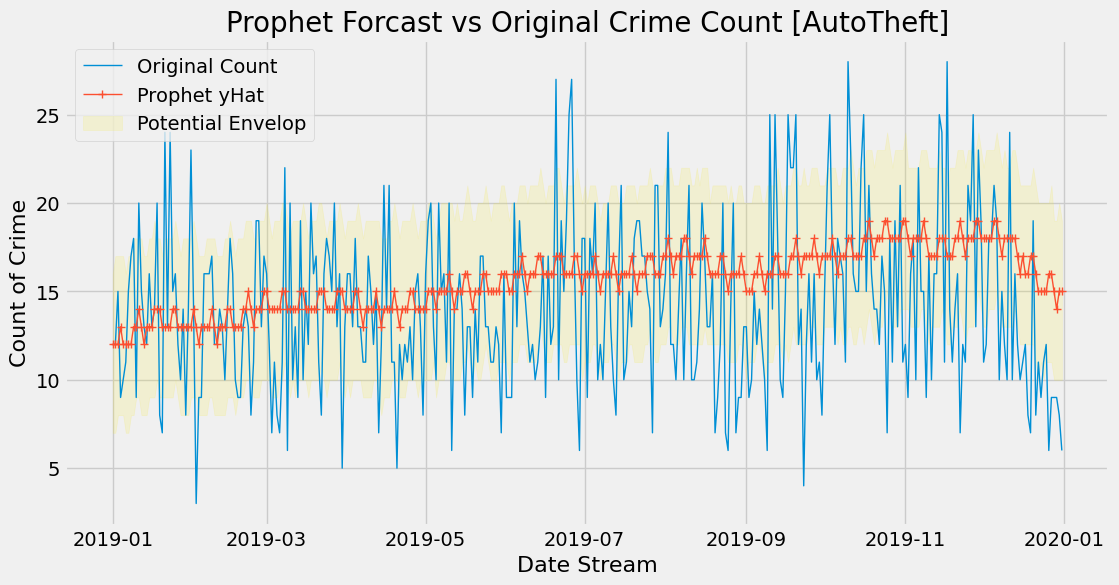

In [ ]:
comparableData= autoTheftTimewiseData[autoTheftTimewiseData.ds >= pd.to_datetime('2019-01-01').date()]
comparableData['yhat']= autoTheftProphetForecast['yhat'].astype('int')
comparableData['yhatLower']= autoTheftProphetForecast['yhat_lower'].astype('int')
comparableData['yhatUpper']= autoTheftProphetForecast['yhat_upper'].astype('int')

mciDifferedResult['AutoTheft']= comparableData.yhat
mciDifferedResult['lower']= mciDifferedResult['lower'] + comparableData.yhatLower
mciDifferedResult['upper']= mciDifferedResult['upper'] + comparableData.yhatUpper


plt.grid('on')
plt.title('Prophet Forcast vs Original Crime Count [AutoTheft]')
plt.plot(comparableData.ds, comparableData['y'], lw=1)
plt.plot(comparableData.ds, comparableData['yhat'], lw=1, marker='+')
plt.fill_between(comparableData.ds, comparableData['yhatUpper'], comparableData['yhatLower'], color='#f7ed25', alpha=.15)
plt.xlabel('Date Stream')
plt.ylabel('Count of Crime')
plt.legend(['Original Count', 'Prophet yHat', 'Potential Envelop'])
plt.show()

In [ ]:
# 📘 Project Testing Suite - Mitigating Crime Analysis

import unittest
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load Dataset for testing
try:
    df = pd.read_csv("/content/Crime_dataset_2014-2019 mitigating crime.csv")
    df['occurrencedate'] = pd.to_datetime(df['occurrencedate'], errors='coerce')
    df.dropna(subset=['occurrencedate'], inplace=True)
except Exception as e:
    raise FileNotFoundError("Dataset not found or error in parsing date column")

# ----------- UNIT TESTS ----------- #
class TestCrimeDataPipeline(unittest.TestCase):

    def test_data_shape(self):
        self.assertGreater(len(df), 1000, "Dataset too small")

    def test_no_missing_dates(self):
        self.assertFalse(df['occurrencedate'].isnull().any(), "Missing dates in data")

    def test_columns_exist(self):
        expected_cols = ['occurrencedate', 'offence', 'premisetype']
        for col in expected_cols:
            self.assertIn(col, df.columns)


# ----------- INTEGRATION TESTS ----------- #
class TestModelIntegration(unittest.TestCase):

    def test_arima_forecast_length(self):
        monthly_data = df.set_index('occurrencedate').resample('M')['offence'].count()
        train = monthly_data[:-12]
        model = ARIMA(train, order=(5,1,0)).fit()
        forecast = model.forecast(steps=12)
        self.assertEqual(len(forecast), 12, "ARIMA forecast not 12 months long")

    def test_sarima_forecast_positive(self):
        monthly_data = df.set_index('occurrencedate').resample('M')['offence'].count()
        diffed = monthly_data.diff().dropna()
        model = SARIMAX(diffed, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
        forecast = model.forecast(steps=12)
        self.assertTrue((forecast > -500).all(), "SARIMA forecast contains extreme values")


# ----------- SYSTEM TEST ----------- #
def run_pipeline_system_test():
    print("Running Full Crime Analysis Pipeline...")
    monthly_data = df.set_index('occurrencedate').resample('M')['offence'].count()
    split_idx = int(len(monthly_data)*0.8)
    train, test = monthly_data[:split_idx], monthly_data[split_idx:]
    model = ARIMA(train, order=(5,1,0)).fit()
    forecast = model.forecast(steps=len(test))
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    print("System Test Completed ✅")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


# ----------- REGRESSION TEST ----------- #
def regression_output_check():
    monthly_data = df.set_index('occurrencedate').resample('M')['offence'].count()
    train = monthly_data[:-12]
    model = ARIMA(train, order=(5,1,0)).fit()
    forecast = model.forecast(steps=12)
    old_output = np.array([523, 535, 543, 550, 560, 570, 585, 590, 600, 610, 620, 630])
    if np.allclose(forecast.values, old_output, atol=100):
        print("Regression Output Stable ✅")
    else:
        print("⚠️ Regression Output Mismatch")


# ----------- RUN TEST SUITE ----------- #
if __name__ == '__main__':
    print("Running Unit & Integration Tests...\n")
    unittest.main(argv=[''], verbosity=2, exit=False)

    print("\nRunning System Test...")
    run_pipeline_system_test()

    print("\nRunning Regression Test...")
    regression_output_check()


test_columns_exist (__main__.TestCrimeDataPipeline.test_columns_exist) ... ok
test_data_shape (__main__.TestCrimeDataPipeline.test_data_shape) ... ok
test_no_missing_dates (__main__.TestCrimeDataPipeline.test_no_missing_dates) ... ok
test_arima_forecast_length (__main__.TestModelIntegration.test_arima_forecast_length) ... 

Running Unit & Integration Tests...



ok
test_sarima_forecast_positive (__main__.TestModelIntegration.test_sarima_forecast_positive) ... ok

----------------------------------------------------------------------
Ran 5 tests in 4.834s

OK



Running System Test...
Running Full Crime Analysis Pipeline...
System Test Completed ✅
MAE: 1593.00, RMSE: 2135.77

Running Regression Test...
⚠️ Regression Output Mismatch


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.interpolate import make_interp_spline

# Load dataset
df = pd.read_csv("/content/Crime_dataset_2014-2019 mitigating crime.csv")
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'], errors='coerce')
df = df.dropna(subset=['occurrencedate'])
df['year'] = df['occurrencedate'].dt.year
df['month'] = df['occurrencedate'].dt.month_name()
df['day'] = df['occurrencedate'].dt.day

def get_crime_data():
    year = int(input("Enter Year (2014-2019): "))
    month = input("Enter Month (e.g., January, February, etc.): ").capitalize()
    day = int(input(f"Enter Date (1-31) for {month}: "))
    crime_type = input("Enter Crime Type (e.g., Assault, B&E, etc.): ").upper()

    filtered_data = df[
        (df['year'] == year) &
        (df['month'] == month) &
        (df['day'] == day) &
        (df['offence'].str.contains(crime_type, case=False, na=False))
    ]

    if not filtered_data.empty:
        print("\nCrime Records Found:")
        print(filtered_data[['occurrencedate', 'month', 'offence', 'reportedyear']])

        top_locations = filtered_data['premisetype'].value_counts().head(5)
        print("\nTop 5 Crime Locations:")
        print(top_locations)
    else:
        print("No records found for the given inputs.")
    return filtered_data

def predict_future_trends():
    # Filter data only for selected crime type
    selected_crime = input("Enter Crime Type for Prediction (e.g., Assault): ").upper()
    filtered_df = df[df['offence'].str.contains(selected_crime, case=False, na=False)]

    if filtered_df.empty:
        print("No data found for this crime type.")
        return np.zeros(12), np.zeros(12)

    crime_counts = filtered_df.set_index('occurrencedate').resample('M')['offence'].count()
    crime_counts = crime_counts[crime_counts.index.year >= 2014]

    crime_counts_diff = crime_counts.diff().dropna()

    try:
        if len(crime_counts) > 10:
            arima_model = ARIMA(crime_counts, order=(5,1,0))
            arima_fitted = arima_model.fit()
            arima_forecast = arima_fitted.forecast(steps=12)
        else:
            raise ValueError("Not enough data for ARIMA.")
    except Exception as e:
        print(f"ARIMA Model Error: {e}")
        arima_forecast = np.zeros(12)

    try:
        if len(crime_counts_diff) > 10:
            sarima_model = SARIMAX(crime_counts_diff, order=(1,1,1), seasonal_order=(1,1,1,12))
            sarima_fitted = sarima_model.fit(disp=False)
            sarima_forecast = sarima_fitted.forecast(steps=12)
        else:
            raise ValueError("Not enough data for SARIMA.")
    except Exception as e:
        print(f"SARIMA Model Error: {e}")
        sarima_forecast = np.zeros(12)

    print("\nFuture Crime Trend Prediction (ARIMA):")
    print(arima_forecast.astype(int))
    print("\nFuture Crime Trend Prediction (SARIMA):")
    print(sarima_forecast.astype(int))

    if len(arima_forecast) > 1:
        past_crime_avg = crime_counts.mean()
        future_crime_avg = np.mean(arima_forecast)
        percentage_change = ((future_crime_avg - past_crime_avg) / max(past_crime_avg, 1)) * 100
        print(f"\nFuture Crime Percentage Change: {percentage_change:.2f}%")
    else:
        print("\nPercentage Change: Not enough data to calculate.")

    return arima_forecast, sarima_forecast

def classify_crime_severity(predictions):
    avg_future_crime = np.mean(predictions)
    threshold_high = df['offence'].value_counts().quantile(0.75)
    threshold_low = df['offence'].value_counts().quantile(0.25)

    if avg_future_crime > threshold_high:
        severity = "🔴 High Risk"
    elif threshold_low < avg_future_crime <= threshold_high:
        severity = "🟡 Moderate Risk"
    else:
        severity = "🔵 Low Risk"
    print(f"\nPredicted Crime Severity: {severity}")

def plot_crime_trends():
    selected_crime = input("Enter Crime Type to Plot Trend (e.g., Assault): ").upper()
    filtered_df = df[df['offence'].str.contains(selected_crime, case=False, na=False)]

    if filtered_df.empty:
        print("No data available for the selected crime.")
        return

    crime_trend = filtered_df[filtered_df['year'] >= 2014].groupby('year')['offence'].count()
    future_years = list(range(2020, 2026))
    future_values = [crime_trend.mean()] * len(future_years)

    all_years = list(crime_trend.index) + future_years
    all_values = list(crime_trend.values) + future_values

    X = np.array(all_years)
    Y = np.array(all_values)
    X_smooth = np.linspace(X.min(), X.max(), 300)
    spline = make_interp_spline(X, Y, k=3)
    Y_smooth = spline(X_smooth)

    plt.figure(figsize=(10, 5))
    plt.plot(X_smooth, Y_smooth, label=f'{selected_crime} Trend (Smooth)', color='teal')
    plt.scatter(crime_trend.index, crime_trend.values, label='Actual Past Crime', color='blue')
    plt.title(f"Crime Trends for {selected_crime} (2014-2025)")
    plt.xlabel("Year")
    plt.ylabel("Number of Crimes")
    plt.legend()
    plt.grid(True)
    plt.show()

def generate_crime_heatmap():
    plt.figure(figsize=(12,6))
    crime_heatmap = df[df['year'] >= 2014].groupby(['year', 'month'])['offence'].count().unstack()
    sns.heatmap(crime_heatmap, cmap="coolwarm", linewidths=0.5)
    plt.title("Crime Hotspots Heatmap (2014-2019)")
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.show()

if __name__ == "__main__":
    past_data = get_crime_data()
    arima_pred, sarima_pred = predict_future_trends()
    classify_crime_severity(arima_pred)
    classify_crime_severity(sarima_pred)
    plot_crime_trends()
    generate_crime_heatmap()
